In [1]:
import os
from os.path import expanduser
home_dir = expanduser("~")
module_path = home_dir + '/code/modules/'
import sys
sys.path.append(module_path)
fig_dir = 'figures/'
import time
import importlib
import random
import tensorflow as tf
import pandas as pd
from keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, concatenate
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
#import model_management
from scipy.special import comb
import datetime
import codecs, json
from itertools import combinations
%load_ext autoreload
%autoreload 1
%aimport data_processing
%aimport plotting
%aimport keras_objects
from data_processing import *
from plotting import *
from keras_objects import *

np.random.seed(999)
random.seed(999)

#loss_func_dict = {
#    'mse': 'mse',
#    'mae': 'mae',
#    'weighted_mse_1': weighted_mse_1,
#    'stellar_mass_weighted_mse': stellar_mass_weighted_mse
#}

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
### Run on CPU only
os.environ["CUDA_VISIBLE_DEVICES"] = ""

## Set parameter string

In [ ]:
### Set name ending with parameters for figures to be saved
param_string = 'nLayers_%d_nNeurons_%d_actFun_%s_lossFunc_%s_nTrainSamples_%d_nEpochs_%d_batchSize_%d' % (
    nLayers, neuronsPerLayer, activationFunction, loss_function, train_size, nEpochs, batchSize)
print(param_string)

In [ ]:
print(np.mean(y_test_norm, 0))
print(np.std(y_test_norm, 0))
print(np.min(x_test_norm, 0))
print(np.max(x_test_norm, 0))

In [ ]:
### Get a feel for the data
for i in range(len(input_features)):
    print(input_features[i],': min: %.2e, max: %.2e.' % (np.min(x_train[:,i]), np.max(x_train[:,i])))
for i in range(len(output_features)):
    print(output_features[i],': min: %.2e, max: %.2e.' % (np.min(y_train[:,i]), np.max(y_train[:,i])))

In [ ]:
### Visualisation for when we have 2 input features
%matplotlib notebook
input_feat_1 = 0
input_feat_2 = 1
output_feat = 1

fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_norm[:500,input_feat_1], x_train_norm[:500,input_feat_2], 
           y_train_norm[:500,output_feat])
ax.set_xlabel('%s log($M_{H}/M_{S}$)' % (input_features[input_feat_1]))
ax.set_ylabel('%s log($M_{H}/M_{S}$)' % (input_features[input_feat_2]))
ax.set_zlabel('%s log($M_{G}/M_{S}$)' % (output_features[output_feat]))
plt.show()

## Load an existing model

In [ ]:
### Search for the model that you want
importlib.reload(model_management)
search_dict = {
    'training_method': 'backprop'
}
[model_dicts, description_dicts] = model_management.SearchModel(search_dict, get_hits=True)
print(description_dicts)
print('\n')
for key in model_dicts:
    print(key)
    print(model_dicts[key])
    print('\n')


In [ ]:
importlib.reload(model_management)
model, model_dict, description = model_management.LoadModel(search_dict, 1)

## Get the standard pictures

In [129]:
mode = 'test' # 'train', 'val, 'test'

In [130]:
norm_scores = model.evaluate(x=training_data_dict['input_test_dict'], y=training_data_dict['output_test_dict'],
                                               verbose=1)
tot_score = norm_scores#[0]
predicted_points = predict_points(model, training_data_dict, data_type = mode)
title = 'Inputs: %s\n%.1e train points, test mse %.3e, %s data' % (', '.join(input_features), train_size, tot_score, mode)

25000/25000 [==============================] - 2s 76us/step


In [ ]:
### Plots involving Stellar mass
fig2 = get_real_vs_pred_boxplot(model, training_data_dict, unit_dict, data_keys, predicted_feat = 'Stellar_mass', 
                                binning_feat = 'Halo_mass', title=title, data_type=mode,
                                predicted_points = predicted_points)
fig3 = get_scatter_comparison_plots(model, training_data_dict, unit_dict, x_axis_feature = 'Halo_mass', 
                                    y_axis_feature = 'Stellar_mass', title=title, y_max = None, y_min = None,
                                    x_min = None, x_max = None, data_type=mode, predicted_points = predicted_points)
plt.show

IndexError: too many indices for array

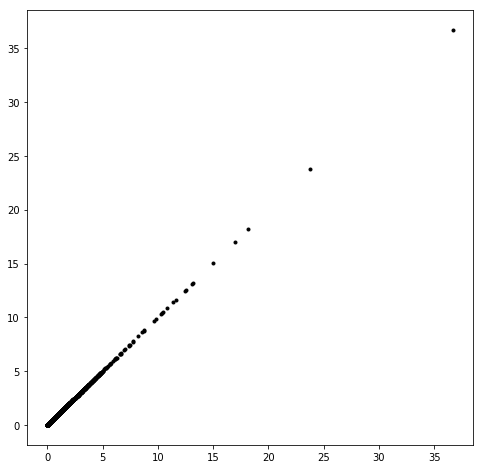

In [131]:
### Plots involving SFR
fig1 = get_pred_vs_real_scatterplot(model, training_data_dict, unit_dict, data_keys, 'SFR', title=title, data_type=mode,
                                   predicted_points = predicted_points)
fig4 = get_real_vs_pred_boxplot(model, training_data_dict, unit_dict, data_keys, predicted_feat = 'SFR', 
                                binning_feat = 'Stellar_mass', title=title, data_type=mode,
                                predicted_points = predicted_points)
fig5 = get_scatter_comparison_plots(model, training_data_dict, unit_dict, x_axis_feature = 'Stellar_mass', 
                                    y_axis_feature = 'SFR', title=title, y_max = 5, y_min = None,
                                    x_min = None, x_max = None, data_type=mode, predicted_points = predicted_points)

plt.show

In [ ]:
fig6 = get_real_vs_pred_same_fig(model, training_data_dict, unit_dict, x_axis_feature='Halo_mass', 
                                 y_axis_feature = 'Stellar_mass', title=title, data_type=mode, marker_size=5,
                                 y_min=None, y_max=None, x_min=None, x_max=None)
plt.show

In [128]:
fig7 = get_real_vs_pred_same_fig(model, training_data_dict, unit_dict, x_axis_feature='Halo_mass', 
                                 y_axis_feature = 'SFR', title=title, data_type=mode, marker_size=5,
                                 y_min=None, y_max=10, x_min=None, x_max=None)
plt.show

IndexError: too many indices for array

In [78]:
print(training_data_dict['y_data_keys']['Stellar_mass'])

0


In [ ]:
### Save the figures
date_string = datetime.datetime.now().strftime('%Y-%m-%d2')
fig1.savefig(fig_dir + date_string + '_' + '_'.join(input_features) + '_true_pred_sfr_scatter.png', bbox_inches = 'tight')
fig2.savefig(fig_dir + date_string + '_' + '_'.join(input_features) + '_boxplot_stellar_mass.png', bbox_inches = 'tight')
fig3.savefig(fig_dir + date_string + '_' + '_'.join(input_features) + '_scatter_comp_halo_vs_stellar_mass.png', bbox_inches = 'tight')
fig4.savefig(fig_dir + date_string + '_' + '_'.join(input_features) + '_boxplot_sfr.png', bbox_inches = 'tight')
fig5.savefig(fig_dir + date_string + '_' + '_'.join(input_features) + '_scatter_comp_stellar_mass_vs_sfr.png', bbox_inches = 'tight')

## Create a new model

In [125]:
### General parameters
nr_steps = 1e5
batch_size = 5e4
total_set_size = 3e5 # how many examples will be used for training+validation+testing
train_size = 2.5e5
val_size = .25e5
test_size = .25e5
norm = 'zero_to_one' # 'none',   'zero_mean_unit_std',   'zero_to_one'
input_features = ['Halo_mass', 'Halo_mass_peak', 'Scale_half_mass', 'Scale_peak_mass']
output_features = ['SFR']

outputs_to_weigh = ['Stellar_mass']

nr_epochs = nr_steps * batch_size / train_size

early_stop_patience = nr_epochs / 5
early_stop_monitor = 'val_loss'
early_stop_min_delta = 1e-16

validation_data = 'val' #'val' is normally used, use 'train' to check overfitting potential

### Network parameters
nLayers = 10
activationFunction = 'tanh'
neuronsPerLayer = 10
reg_strength = 0#1e-5


In [126]:
# load the selected galaxyfile
galaxies, data_keys, unit_dict = load_galfile()
    
# prepare the training data
training_data_dict = divide_train_data(galaxies, data_keys, input_features, output_features, 
                                       int(total_set_size), int(train_size), int(val_size), int(test_size))
#galaxies = None
training_data_dict = normalise_data(training_data_dict, norm)

In [127]:
# Create model
main_input = Input(shape=(len(input_features),), name = 'main_input')

for i in range(0, nLayers-1): # -1 because one layer is added automatically with the input layer
    x = Dense(neuronsPerLayer, kernel_regularizer=regularizers.l2(reg_strength))(main_input)
    x = LeakyReLU(alpha = 0.1)(x)
        
output_layers = []
for feat in output_features:
    output_layers.append(Dense(1, kernel_regularizer=regularizers.l2(reg_strength), name = feat,
                              activation = 'relu')(x))

model = Model(main_input, output_layers)
model.compile(optimizer = 'adam', loss = 'mse')

earlystop = EarlyStopping(monitor=early_stop_monitor, min_delta=early_stop_min_delta, patience=early_stop_patience, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]

# set data point weights
train_weights_tmp = training_data_dict['original_data'][training_data_dict['train_indices'], 
                                              training_data_dict['original_data_keys']['Halo_mass']]
train_weights_tmp = np.power(10, train_weights_tmp)
train_weights_tmp = train_weights_tmp / np.sum(train_weights_tmp)
val_weights_tmp = training_data_dict['original_data'][training_data_dict['val_indices'], 
                                              training_data_dict['original_data_keys']['Halo_mass']]
val_weights_tmp = np.power(10, val_weights_tmp)
val_weights_tmp = val_weights_tmp / np.sum(val_weights_tmp)
train_weights = {}
val_weights = {}
    
for output in output_features:
    if output in outputs_to_weigh:
        train_weights[output] = train_weights_tmp
        val_weights[output] = val_weights_tmp
    else:
        train_weights[output] = np.ones(int(train_size))
        val_weights[output] = np.ones(int(val_size))

history = model.fit(x = training_data_dict['input_train_dict'], y = training_data_dict['output_train_dict'], 
                    validation_data = (training_data_dict['input_'+validation_data+'_dict'], 
                    training_data_dict['output_'+validation_data+'_dict'], val_weights), 
                    epochs=int(nr_epochs), batch_size=int(batch_size), callbacks=callbacks_list,
                    sample_weight=train_weights)

Train on 250000 samples, validate on 25000 samples
Epoch 1/20000
250000/250000 [==============================] - 2s 9us/step - loss: 0.1856 - val_loss: 0.1690
Epoch 2/20000
250000/250000 [==============================] - 0s 1us/step - loss: 0.1557 - val_loss: 0.1393
Epoch 3/20000
250000/250000 [==============================] - 0s 1us/step - loss: 0.1273 - val_loss: 0.1125
Epoch 4/20000
250000/250000 [==============================] - 0s 1us/step - loss: 0.1020 - val_loss: 0.0892
Epoch 5/20000
250000/250000 [==============================] - 0s 1us/step - loss: 0.0802 - val_loss: 0.0694
Epoch 6/20000
250000/250000 [==============================] - 0s 1us/step - loss: 0.0619 - val_loss: 0.0530
Epoch 7/20000
250000/250000 [==============================] - 0s 1us/step - loss: 0.0469 - val_loss: 0.0398
Epoch 8/20000
250000/250000 [==============================] - 0s 1us/step - loss: 0.0350 - val_loss: 0.0295
Epoch 9/20000
250000/250000 [==============================] - 0s 1us/step - 

250000/250000 [==============================] - 0s 1us/step - loss: 3.5121e-04 - val_loss: 3.1634e-04
Epoch 73/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.5048e-04 - val_loss: 3.1548e-04
Epoch 74/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.4979e-04 - val_loss: 3.1470e-04
Epoch 75/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.4915e-04 - val_loss: 3.1397e-04
Epoch 76/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.4856e-04 - val_loss: 3.1328e-04
Epoch 77/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.4799e-04 - val_loss: 3.1262e-04
Epoch 78/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.4745e-04 - val_loss: 3.1199e-04
Epoch 79/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.4694e-04 - val_loss: 3.1138e-04
Epoch 80/20000
250000/250000 [==============================] - 0s 1us/

250000/250000 [==============================] - 0s 1us/step - loss: 3.2284e-04 - val_loss: 2.9042e-04
Epoch 142/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.2233e-04 - val_loss: 2.9004e-04
Epoch 143/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.2179e-04 - val_loss: 2.8964e-04
Epoch 144/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.2126e-04 - val_loss: 2.8922e-04
Epoch 145/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.2072e-04 - val_loss: 2.8878e-04
Epoch 146/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.2017e-04 - val_loss: 2.8834e-04
Epoch 147/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.1960e-04 - val_loss: 2.8789e-04
Epoch 148/20000
250000/250000 [==============================] - 0s 1us/step - loss: 3.1903e-04 - val_loss: 2.8743e-04
Epoch 149/20000
250000/250000 [==============================] -

Epoch 210/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.7242e-04 - val_loss: 2.4828e-04
Epoch 211/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.7171e-04 - val_loss: 2.4763e-04
Epoch 212/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.7102e-04 - val_loss: 2.4697e-04
Epoch 213/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.7034e-04 - val_loss: 2.4632e-04
Epoch 214/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.6968e-04 - val_loss: 2.4568e-04
Epoch 215/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.6901e-04 - val_loss: 2.4505e-04
Epoch 216/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.6836e-04 - val_loss: 2.4443e-04
Epoch 217/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.6774e-04 - val_loss: 2.4380e-04
Epoch 218/20000
250000/250000 [=================

Epoch 279/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4922e-04 - val_loss: 2.2454e-04
Epoch 280/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4914e-04 - val_loss: 2.2445e-04
Epoch 281/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4906e-04 - val_loss: 2.2436e-04
Epoch 282/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4897e-04 - val_loss: 2.2427e-04
Epoch 283/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4889e-04 - val_loss: 2.2418e-04
Epoch 284/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4882e-04 - val_loss: 2.2409e-04
Epoch 285/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4874e-04 - val_loss: 2.2400e-04
Epoch 286/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4867e-04 - val_loss: 2.2393e-04
Epoch 287/20000
250000/250000 [=================

Epoch 348/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4577e-04 - val_loss: 2.2064e-04
Epoch 349/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4573e-04 - val_loss: 2.2060e-04
Epoch 350/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4569e-04 - val_loss: 2.2055e-04
Epoch 351/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4565e-04 - val_loss: 2.2050e-04
Epoch 352/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4561e-04 - val_loss: 2.2046e-04
Epoch 353/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4557e-04 - val_loss: 2.2042e-04
Epoch 354/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4553e-04 - val_loss: 2.2038e-04
Epoch 355/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4549e-04 - val_loss: 2.2034e-04
Epoch 356/20000
250000/250000 [=================

Epoch 417/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4274e-04 - val_loss: 2.1757e-04
Epoch 418/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4269e-04 - val_loss: 2.1753e-04
Epoch 419/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4264e-04 - val_loss: 2.1749e-04
Epoch 420/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4260e-04 - val_loss: 2.1743e-04
Epoch 421/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4255e-04 - val_loss: 2.1738e-04
Epoch 422/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4250e-04 - val_loss: 2.1734e-04
Epoch 423/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4245e-04 - val_loss: 2.1729e-04
Epoch 424/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.4240e-04 - val_loss: 2.1725e-04
Epoch 425/20000
250000/250000 [=================

Epoch 486/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3909e-04 - val_loss: 2.1390e-04
Epoch 487/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3904e-04 - val_loss: 2.1384e-04
Epoch 488/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3898e-04 - val_loss: 2.1378e-04
Epoch 489/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3892e-04 - val_loss: 2.1372e-04
Epoch 490/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3886e-04 - val_loss: 2.1366e-04
Epoch 491/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3880e-04 - val_loss: 2.1360e-04
Epoch 492/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3874e-04 - val_loss: 2.1354e-04
Epoch 493/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3868e-04 - val_loss: 2.1347e-04
Epoch 494/20000
250000/250000 [=================

Epoch 555/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3477e-04 - val_loss: 2.0924e-04
Epoch 556/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3470e-04 - val_loss: 2.0916e-04
Epoch 557/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3463e-04 - val_loss: 2.0909e-04
Epoch 558/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3457e-04 - val_loss: 2.0903e-04
Epoch 559/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3450e-04 - val_loss: 2.0894e-04
Epoch 560/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3443e-04 - val_loss: 2.0887e-04
Epoch 561/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3436e-04 - val_loss: 2.0880e-04
Epoch 562/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.3430e-04 - val_loss: 2.0872e-04
Epoch 563/20000
250000/250000 [=================

Epoch 624/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2976e-04 - val_loss: 2.0388e-04
Epoch 625/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2968e-04 - val_loss: 2.0381e-04
Epoch 626/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2960e-04 - val_loss: 2.0371e-04
Epoch 627/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2952e-04 - val_loss: 2.0362e-04
Epoch 628/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2944e-04 - val_loss: 2.0354e-04
Epoch 629/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2936e-04 - val_loss: 2.0346e-04
Epoch 630/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2928e-04 - val_loss: 2.0337e-04
Epoch 631/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2921e-04 - val_loss: 2.0328e-04
Epoch 632/20000
250000/250000 [=================

Epoch 693/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2392e-04 - val_loss: 1.9757e-04
Epoch 694/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2384e-04 - val_loss: 1.9745e-04
Epoch 695/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2374e-04 - val_loss: 1.9734e-04
Epoch 696/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2366e-04 - val_loss: 1.9724e-04
Epoch 697/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2357e-04 - val_loss: 1.9716e-04
Epoch 698/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2347e-04 - val_loss: 1.9706e-04
Epoch 699/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2338e-04 - val_loss: 1.9696e-04
Epoch 700/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.2329e-04 - val_loss: 1.9687e-04
Epoch 701/20000
250000/250000 [=================

Epoch 762/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.1697e-04 - val_loss: 1.9028e-04
Epoch 763/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.1685e-04 - val_loss: 1.9015e-04
Epoch 764/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.1674e-04 - val_loss: 1.9001e-04
Epoch 765/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.1662e-04 - val_loss: 1.8989e-04
Epoch 766/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.1650e-04 - val_loss: 1.8977e-04
Epoch 767/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.1638e-04 - val_loss: 1.8965e-04
Epoch 768/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.1625e-04 - val_loss: 1.8952e-04
Epoch 769/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.1613e-04 - val_loss: 1.8939e-04
Epoch 770/20000
250000/250000 [=================

Epoch 831/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0738e-04 - val_loss: 1.8005e-04
Epoch 832/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0724e-04 - val_loss: 1.7989e-04
Epoch 833/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0710e-04 - val_loss: 1.7975e-04
Epoch 834/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0696e-04 - val_loss: 1.7960e-04
Epoch 835/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0683e-04 - val_loss: 1.7947e-04
Epoch 836/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0669e-04 - val_loss: 1.7932e-04
Epoch 837/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0655e-04 - val_loss: 1.7919e-04
Epoch 838/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0642e-04 - val_loss: 1.7903e-04
Epoch 839/20000
250000/250000 [=================

Epoch 900/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0045e-04 - val_loss: 1.7258e-04
Epoch 901/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0039e-04 - val_loss: 1.7246e-04
Epoch 902/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0032e-04 - val_loss: 1.7239e-04
Epoch 903/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0027e-04 - val_loss: 1.7230e-04
Epoch 904/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0020e-04 - val_loss: 1.7227e-04
Epoch 905/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0015e-04 - val_loss: 1.7225e-04
Epoch 906/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0009e-04 - val_loss: 1.7214e-04
Epoch 907/20000
250000/250000 [==============================] - 0s 1us/step - loss: 2.0003e-04 - val_loss: 1.7203e-04
Epoch 908/20000
250000/250000 [=================

Epoch 969/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9786e-04 - val_loss: 1.6953e-04
Epoch 970/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9784e-04 - val_loss: 1.6953e-04
Epoch 971/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9782e-04 - val_loss: 1.6945e-04
Epoch 972/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9780e-04 - val_loss: 1.6942e-04
Epoch 973/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9778e-04 - val_loss: 1.6944e-04
Epoch 974/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9776e-04 - val_loss: 1.6942e-04
Epoch 975/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9775e-04 - val_loss: 1.6936e-04
Epoch 976/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9772e-04 - val_loss: 1.6940e-04
Epoch 977/20000
250000/250000 [=================

250000/250000 [==============================] - 0s 1us/step - loss: 1.9687e-04 - val_loss: 1.6840e-04
Epoch 1038/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9686e-04 - val_loss: 1.6832e-04
Epoch 1039/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9685e-04 - val_loss: 1.6818e-04
Epoch 1040/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9684e-04 - val_loss: 1.6827e-04
Epoch 1041/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9683e-04 - val_loss: 1.6829e-04
Epoch 1042/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9682e-04 - val_loss: 1.6818e-04
Epoch 1043/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9679e-04 - val_loss: 1.6823e-04
Epoch 1044/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9679e-04 - val_loss: 1.6827e-04
Epoch 1045/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.9606e-04 - val_loss: 1.6740e-04
Epoch 1106/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9606e-04 - val_loss: 1.6744e-04
Epoch 1107/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9604e-04 - val_loss: 1.6731e-04
Epoch 1108/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9603e-04 - val_loss: 1.6735e-04
Epoch 1109/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9602e-04 - val_loss: 1.6740e-04
Epoch 1110/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9601e-04 - val_loss: 1.6727e-04
Epoch 1111/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9599e-04 - val_loss: 1.6732e-04
Epoch 1112/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9598e-04 - val_loss: 1.6737e-04
Epoch 1113/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.9524e-04 - val_loss: 1.6645e-04
Epoch 1174/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9522e-04 - val_loss: 1.6650e-04
Epoch 1175/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9521e-04 - val_loss: 1.6645e-04
Epoch 1176/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9520e-04 - val_loss: 1.6642e-04
Epoch 1177/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9519e-04 - val_loss: 1.6645e-04
Epoch 1178/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9517e-04 - val_loss: 1.6638e-04
Epoch 1179/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9517e-04 - val_loss: 1.6637e-04
Epoch 1180/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9514e-04 - val_loss: 1.6647e-04
Epoch 1181/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.9431e-04 - val_loss: 1.6555e-04
Epoch 1242/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9431e-04 - val_loss: 1.6550e-04
Epoch 1243/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9431e-04 - val_loss: 1.6540e-04
Epoch 1244/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9427e-04 - val_loss: 1.6556e-04
Epoch 1245/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9427e-04 - val_loss: 1.6541e-04
Epoch 1246/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9425e-04 - val_loss: 1.6542e-04
Epoch 1247/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9423e-04 - val_loss: 1.6539e-04
Epoch 1248/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9421e-04 - val_loss: 1.6545e-04
Epoch 1249/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.9319e-04 - val_loss: 1.6428e-04
Epoch 1310/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9317e-04 - val_loss: 1.6433e-04
Epoch 1311/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9316e-04 - val_loss: 1.6431e-04
Epoch 1312/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9314e-04 - val_loss: 1.6421e-04
Epoch 1313/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9310e-04 - val_loss: 1.6426e-04
Epoch 1314/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9308e-04 - val_loss: 1.6420e-04
Epoch 1315/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9306e-04 - val_loss: 1.6419e-04
Epoch 1316/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.9303e-04 - val_loss: 1.6412e-04
Epoch 1317/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.8578e-04 - val_loss: 1.5855e-04
Epoch 1378/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8570e-04 - val_loss: 1.5862e-04
Epoch 1379/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8564e-04 - val_loss: 1.5841e-04
Epoch 1380/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8552e-04 - val_loss: 1.5838e-04
Epoch 1381/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8543e-04 - val_loss: 1.5829e-04
Epoch 1382/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8535e-04 - val_loss: 1.5822e-04
Epoch 1383/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8526e-04 - val_loss: 1.5810e-04
Epoch 1384/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8517e-04 - val_loss: 1.5804e-04
Epoch 1385/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.8088e-04 - val_loss: 1.5380e-04
Epoch 1446/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8082e-04 - val_loss: 1.5368e-04
Epoch 1447/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8076e-04 - val_loss: 1.5368e-04
Epoch 1448/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8071e-04 - val_loss: 1.5354e-04
Epoch 1449/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8065e-04 - val_loss: 1.5359e-04
Epoch 1450/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8060e-04 - val_loss: 1.5344e-04
Epoch 1451/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8055e-04 - val_loss: 1.5338e-04
Epoch 1452/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.8049e-04 - val_loss: 1.5339e-04
Epoch 1453/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.7770e-04 - val_loss: 1.5094e-04
Epoch 1514/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7769e-04 - val_loss: 1.5059e-04
Epoch 1515/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7764e-04 - val_loss: 1.5064e-04
Epoch 1516/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7757e-04 - val_loss: 1.5059e-04
Epoch 1517/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7753e-04 - val_loss: 1.5055e-04
Epoch 1518/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7748e-04 - val_loss: 1.5049e-04
Epoch 1519/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7744e-04 - val_loss: 1.5045e-04
Epoch 1520/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7741e-04 - val_loss: 1.5041e-04
Epoch 1521/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.7510e-04 - val_loss: 1.4878e-04
Epoch 1582/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7510e-04 - val_loss: 1.4844e-04
Epoch 1583/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7504e-04 - val_loss: 1.4848e-04
Epoch 1584/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7500e-04 - val_loss: 1.4845e-04
Epoch 1585/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7500e-04 - val_loss: 1.4834e-04
Epoch 1586/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7499e-04 - val_loss: 1.4872e-04
Epoch 1587/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7495e-04 - val_loss: 1.4831e-04
Epoch 1588/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7502e-04 - val_loss: 1.4871e-04
Epoch 1589/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.7283e-04 - val_loss: 1.4673e-04
Epoch 1650/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7278e-04 - val_loss: 1.4670e-04
Epoch 1651/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7275e-04 - val_loss: 1.4685e-04
Epoch 1652/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7277e-04 - val_loss: 1.4660e-04
Epoch 1653/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7271e-04 - val_loss: 1.4658e-04
Epoch 1654/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7267e-04 - val_loss: 1.4655e-04
Epoch 1655/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7263e-04 - val_loss: 1.4675e-04
Epoch 1656/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7261e-04 - val_loss: 1.4652e-04
Epoch 1657/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.7080e-04 - val_loss: 1.4513e-04
Epoch 1718/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7077e-04 - val_loss: 1.4511e-04
Epoch 1719/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7073e-04 - val_loss: 1.4502e-04
Epoch 1720/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7074e-04 - val_loss: 1.4529e-04
Epoch 1721/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7071e-04 - val_loss: 1.4511e-04
Epoch 1722/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7066e-04 - val_loss: 1.4496e-04
Epoch 1723/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7064e-04 - val_loss: 1.4494e-04
Epoch 1724/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.7064e-04 - val_loss: 1.4487e-04
Epoch 1725/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.6894e-04 - val_loss: 1.4427e-04
Epoch 1786/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6896e-04 - val_loss: 1.4395e-04
Epoch 1787/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6892e-04 - val_loss: 1.4369e-04
Epoch 1788/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6886e-04 - val_loss: 1.4376e-04
Epoch 1789/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6884e-04 - val_loss: 1.4387e-04
Epoch 1790/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6878e-04 - val_loss: 1.4377e-04
Epoch 1791/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6876e-04 - val_loss: 1.4365e-04
Epoch 1792/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6876e-04 - val_loss: 1.4364e-04
Epoch 1793/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.6707e-04 - val_loss: 1.4329e-04
Epoch 1854/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6721e-04 - val_loss: 1.4285e-04
Epoch 1855/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6718e-04 - val_loss: 1.4288e-04
Epoch 1856/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6703e-04 - val_loss: 1.4288e-04
Epoch 1857/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6697e-04 - val_loss: 1.4295e-04
Epoch 1858/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6695e-04 - val_loss: 1.4288e-04
Epoch 1859/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6690e-04 - val_loss: 1.4306e-04
Epoch 1860/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6687e-04 - val_loss: 1.4283e-04
Epoch 1861/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.6540e-04 - val_loss: 1.4210e-04
Epoch 1922/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6545e-04 - val_loss: 1.4262e-04
Epoch 1923/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6531e-04 - val_loss: 1.4255e-04
Epoch 1924/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6522e-04 - val_loss: 1.4209e-04
Epoch 1925/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6517e-04 - val_loss: 1.4220e-04
Epoch 1926/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6514e-04 - val_loss: 1.4204e-04
Epoch 1927/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6520e-04 - val_loss: 1.4201e-04
Epoch 1928/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6518e-04 - val_loss: 1.4198e-04
Epoch 1929/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.6423e-04 - val_loss: 1.4152e-04
Epoch 1990/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6408e-04 - val_loss: 1.4177e-04
Epoch 1991/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6408e-04 - val_loss: 1.4155e-04
Epoch 1992/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6399e-04 - val_loss: 1.4197e-04
Epoch 1993/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6397e-04 - val_loss: 1.4166e-04
Epoch 1994/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6396e-04 - val_loss: 1.4166e-04
Epoch 1995/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6405e-04 - val_loss: 1.4140e-04
Epoch 1996/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6392e-04 - val_loss: 1.4138e-04
Epoch 1997/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.6315e-04 - val_loss: 1.4083e-04
Epoch 2058/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6327e-04 - val_loss: 1.4073e-04
Epoch 2059/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6306e-04 - val_loss: 1.4075e-04
Epoch 2060/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6301e-04 - val_loss: 1.4072e-04
Epoch 2061/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6280e-04 - val_loss: 1.4073e-04
Epoch 2062/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6282e-04 - val_loss: 1.4071e-04
Epoch 2063/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6282e-04 - val_loss: 1.4085e-04
Epoch 2064/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6285e-04 - val_loss: 1.4074e-04
Epoch 2065/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.6229e-04 - val_loss: 1.4126e-04
Epoch 2126/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6208e-04 - val_loss: 1.4095e-04
Epoch 2127/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6210e-04 - val_loss: 1.4139e-04
Epoch 2128/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6215e-04 - val_loss: 1.4079e-04
Epoch 2129/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6196e-04 - val_loss: 1.4035e-04
Epoch 2130/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6191e-04 - val_loss: 1.4035e-04
Epoch 2131/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6182e-04 - val_loss: 1.4020e-04
Epoch 2132/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6178e-04 - val_loss: 1.4022e-04
Epoch 2133/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.6121e-04 - val_loss: 1.3955e-04
Epoch 2194/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6117e-04 - val_loss: 1.3952e-04
Epoch 2195/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6099e-04 - val_loss: 1.3944e-04
Epoch 2196/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6093e-04 - val_loss: 1.3947e-04
Epoch 2197/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6093e-04 - val_loss: 1.3950e-04
Epoch 2198/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6093e-04 - val_loss: 1.3948e-04
Epoch 2199/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6090e-04 - val_loss: 1.3956e-04
Epoch 2200/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6089e-04 - val_loss: 1.3940e-04
Epoch 2201/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.6020e-04 - val_loss: 1.3923e-04
Epoch 2262/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6020e-04 - val_loss: 1.3924e-04
Epoch 2263/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6024e-04 - val_loss: 1.3916e-04
Epoch 2264/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6016e-04 - val_loss: 1.3928e-04
Epoch 2265/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6040e-04 - val_loss: 1.3961e-04
Epoch 2266/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6026e-04 - val_loss: 1.3906e-04
Epoch 2267/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6014e-04 - val_loss: 1.3908e-04
Epoch 2268/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.6015e-04 - val_loss: 1.3897e-04
Epoch 2269/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5956e-04 - val_loss: 1.3847e-04
Epoch 2330/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5954e-04 - val_loss: 1.3849e-04
Epoch 2331/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5949e-04 - val_loss: 1.3854e-04
Epoch 2332/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5955e-04 - val_loss: 1.3872e-04
Epoch 2333/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5976e-04 - val_loss: 1.3998e-04
Epoch 2334/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5978e-04 - val_loss: 1.3904e-04
Epoch 2335/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5962e-04 - val_loss: 1.3885e-04
Epoch 2336/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5960e-04 - val_loss: 1.3840e-04
Epoch 2337/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5894e-04 - val_loss: 1.3864e-04
Epoch 2398/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5897e-04 - val_loss: 1.3866e-04
Epoch 2399/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5891e-04 - val_loss: 1.3824e-04
Epoch 2400/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5884e-04 - val_loss: 1.3809e-04
Epoch 2401/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5901e-04 - val_loss: 1.3799e-04
Epoch 2402/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5884e-04 - val_loss: 1.3801e-04
Epoch 2403/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5881e-04 - val_loss: 1.3804e-04
Epoch 2404/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5885e-04 - val_loss: 1.3804e-04
Epoch 2405/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5865e-04 - val_loss: 1.3850e-04
Epoch 2466/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5862e-04 - val_loss: 1.3780e-04
Epoch 2467/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5835e-04 - val_loss: 1.3775e-04
Epoch 2468/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5843e-04 - val_loss: 1.3775e-04
Epoch 2469/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5837e-04 - val_loss: 1.3771e-04
Epoch 2470/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5866e-04 - val_loss: 1.3828e-04
Epoch 2471/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5886e-04 - val_loss: 1.3922e-04
Epoch 2472/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5886e-04 - val_loss: 1.3903e-04
Epoch 2473/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5783e-04 - val_loss: 1.3817e-04
Epoch 2534/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5799e-04 - val_loss: 1.3757e-04
Epoch 2535/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5777e-04 - val_loss: 1.3741e-04
Epoch 2536/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5774e-04 - val_loss: 1.3780e-04
Epoch 2537/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5788e-04 - val_loss: 1.3815e-04
Epoch 2538/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5792e-04 - val_loss: 1.3778e-04
Epoch 2539/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5777e-04 - val_loss: 1.3742e-04
Epoch 2540/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5775e-04 - val_loss: 1.3741e-04
Epoch 2541/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5730e-04 - val_loss: 1.3722e-04
Epoch 2602/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5730e-04 - val_loss: 1.3717e-04
Epoch 2603/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5727e-04 - val_loss: 1.3738e-04
Epoch 2604/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5742e-04 - val_loss: 1.3703e-04
Epoch 2605/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5732e-04 - val_loss: 1.3703e-04
Epoch 2606/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5736e-04 - val_loss: 1.3744e-04
Epoch 2607/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5739e-04 - val_loss: 1.3757e-04
Epoch 2608/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5740e-04 - val_loss: 1.3722e-04
Epoch 2609/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5686e-04 - val_loss: 1.3697e-04
Epoch 2670/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5687e-04 - val_loss: 1.3700e-04
Epoch 2671/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5689e-04 - val_loss: 1.3708e-04
Epoch 2672/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5682e-04 - val_loss: 1.3707e-04
Epoch 2673/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5689e-04 - val_loss: 1.3691e-04
Epoch 2674/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5687e-04 - val_loss: 1.3730e-04
Epoch 2675/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5734e-04 - val_loss: 1.3701e-04
Epoch 2676/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5695e-04 - val_loss: 1.3699e-04
Epoch 2677/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5649e-04 - val_loss: 1.3687e-04
Epoch 2738/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5665e-04 - val_loss: 1.3674e-04
Epoch 2739/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5709e-04 - val_loss: 1.3711e-04
Epoch 2740/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5673e-04 - val_loss: 1.3709e-04
Epoch 2741/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5681e-04 - val_loss: 1.3697e-04
Epoch 2742/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5666e-04 - val_loss: 1.3688e-04
Epoch 2743/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5660e-04 - val_loss: 1.3674e-04
Epoch 2744/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5656e-04 - val_loss: 1.3679e-04
Epoch 2745/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5664e-04 - val_loss: 1.3662e-04
Epoch 2806/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5616e-04 - val_loss: 1.3675e-04
Epoch 2807/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5616e-04 - val_loss: 1.3764e-04
Epoch 2808/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5620e-04 - val_loss: 1.3802e-04
Epoch 2809/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5640e-04 - val_loss: 1.3727e-04
Epoch 2810/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5660e-04 - val_loss: 1.3674e-04
Epoch 2811/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5631e-04 - val_loss: 1.3663e-04
Epoch 2812/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5612e-04 - val_loss: 1.3657e-04
Epoch 2813/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5578e-04 - val_loss: 1.3651e-04
Epoch 2874/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5564e-04 - val_loss: 1.3649e-04
Epoch 2875/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5587e-04 - val_loss: 1.3649e-04
Epoch 2876/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5584e-04 - val_loss: 1.3647e-04
Epoch 2877/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5580e-04 - val_loss: 1.3717e-04
Epoch 2878/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5572e-04 - val_loss: 1.3655e-04
Epoch 2879/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5562e-04 - val_loss: 1.3667e-04
Epoch 2880/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5564e-04 - val_loss: 1.3664e-04
Epoch 2881/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5535e-04 - val_loss: 1.3641e-04
Epoch 2942/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5534e-04 - val_loss: 1.3636e-04
Epoch 2943/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5531e-04 - val_loss: 1.3665e-04
Epoch 2944/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5538e-04 - val_loss: 1.3661e-04
Epoch 2945/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5532e-04 - val_loss: 1.3668e-04
Epoch 2946/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5537e-04 - val_loss: 1.3666e-04
Epoch 2947/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5536e-04 - val_loss: 1.3656e-04
Epoch 2948/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5533e-04 - val_loss: 1.3654e-04
Epoch 2949/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5506e-04 - val_loss: 1.3630e-04
Epoch 3010/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5502e-04 - val_loss: 1.3670e-04
Epoch 3011/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5527e-04 - val_loss: 1.3662e-04
Epoch 3012/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5545e-04 - val_loss: 1.3625e-04
Epoch 3013/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5534e-04 - val_loss: 1.3638e-04
Epoch 3014/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5523e-04 - val_loss: 1.3632e-04
Epoch 3015/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5520e-04 - val_loss: 1.3634e-04
Epoch 3016/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5507e-04 - val_loss: 1.3626e-04
Epoch 3017/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5478e-04 - val_loss: 1.3619e-04
Epoch 3078/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5493e-04 - val_loss: 1.3673e-04
Epoch 3079/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5507e-04 - val_loss: 1.3688e-04
Epoch 3080/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5501e-04 - val_loss: 1.3650e-04
Epoch 3081/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5492e-04 - val_loss: 1.3616e-04
Epoch 3082/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5489e-04 - val_loss: 1.3646e-04
Epoch 3083/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5513e-04 - val_loss: 1.3693e-04
Epoch 3084/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5498e-04 - val_loss: 1.3661e-04
Epoch 3085/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5464e-04 - val_loss: 1.3618e-04
Epoch 3146/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5474e-04 - val_loss: 1.3631e-04
Epoch 3147/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5470e-04 - val_loss: 1.3710e-04
Epoch 3148/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5472e-04 - val_loss: 1.3739e-04
Epoch 3149/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5471e-04 - val_loss: 1.3648e-04
Epoch 3150/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5453e-04 - val_loss: 1.3607e-04
Epoch 3151/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5449e-04 - val_loss: 1.3601e-04
Epoch 3152/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5456e-04 - val_loss: 1.3604e-04
Epoch 3153/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5442e-04 - val_loss: 1.3691e-04
Epoch 3214/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5455e-04 - val_loss: 1.3600e-04
Epoch 3215/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5439e-04 - val_loss: 1.3589e-04
Epoch 3216/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5426e-04 - val_loss: 1.3590e-04
Epoch 3217/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5431e-04 - val_loss: 1.3596e-04
Epoch 3218/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5427e-04 - val_loss: 1.3599e-04
Epoch 3219/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5420e-04 - val_loss: 1.3625e-04
Epoch 3220/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5455e-04 - val_loss: 1.3615e-04
Epoch 3221/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5411e-04 - val_loss: 1.3682e-04
Epoch 3282/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5407e-04 - val_loss: 1.3581e-04
Epoch 3283/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5393e-04 - val_loss: 1.3588e-04
Epoch 3284/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5394e-04 - val_loss: 1.3579e-04
Epoch 3285/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5393e-04 - val_loss: 1.3586e-04
Epoch 3286/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5394e-04 - val_loss: 1.3586e-04
Epoch 3287/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5405e-04 - val_loss: 1.3579e-04
Epoch 3288/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5401e-04 - val_loss: 1.3575e-04
Epoch 3289/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5375e-04 - val_loss: 1.3572e-04
Epoch 3350/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5388e-04 - val_loss: 1.3589e-04
Epoch 3351/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5382e-04 - val_loss: 1.3625e-04
Epoch 3352/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5374e-04 - val_loss: 1.3634e-04
Epoch 3353/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5384e-04 - val_loss: 1.3709e-04
Epoch 3354/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5424e-04 - val_loss: 1.3595e-04
Epoch 3355/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5393e-04 - val_loss: 1.3573e-04
Epoch 3356/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5375e-04 - val_loss: 1.3585e-04
Epoch 3357/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5364e-04 - val_loss: 1.3575e-04
Epoch 3418/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5379e-04 - val_loss: 1.3634e-04
Epoch 3419/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5356e-04 - val_loss: 1.3610e-04
Epoch 3420/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5350e-04 - val_loss: 1.3569e-04
Epoch 3421/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5348e-04 - val_loss: 1.3571e-04
Epoch 3422/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5360e-04 - val_loss: 1.3569e-04
Epoch 3423/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5373e-04 - val_loss: 1.3619e-04
Epoch 3424/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5370e-04 - val_loss: 1.3605e-04
Epoch 3425/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5329e-04 - val_loss: 1.3588e-04
Epoch 3486/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5329e-04 - val_loss: 1.3598e-04
Epoch 3487/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5339e-04 - val_loss: 1.3607e-04
Epoch 3488/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5342e-04 - val_loss: 1.3563e-04
Epoch 3489/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5326e-04 - val_loss: 1.3560e-04
Epoch 3490/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5333e-04 - val_loss: 1.3576e-04
Epoch 3491/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5323e-04 - val_loss: 1.3564e-04
Epoch 3492/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5336e-04 - val_loss: 1.3615e-04
Epoch 3493/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5309e-04 - val_loss: 1.3571e-04
Epoch 3554/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5303e-04 - val_loss: 1.3566e-04
Epoch 3555/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5306e-04 - val_loss: 1.3573e-04
Epoch 3556/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5325e-04 - val_loss: 1.3554e-04
Epoch 3557/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5312e-04 - val_loss: 1.3571e-04
Epoch 3558/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5320e-04 - val_loss: 1.3557e-04
Epoch 3559/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5306e-04 - val_loss: 1.3631e-04
Epoch 3560/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5323e-04 - val_loss: 1.3588e-04
Epoch 3561/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5287e-04 - val_loss: 1.3546e-04
Epoch 3622/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5285e-04 - val_loss: 1.3546e-04
Epoch 3623/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5282e-04 - val_loss: 1.3554e-04
Epoch 3624/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5281e-04 - val_loss: 1.3543e-04
Epoch 3625/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5287e-04 - val_loss: 1.3565e-04
Epoch 3626/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5283e-04 - val_loss: 1.3546e-04
Epoch 3627/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5282e-04 - val_loss: 1.3555e-04
Epoch 3628/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5281e-04 - val_loss: 1.3539e-04
Epoch 3629/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5266e-04 - val_loss: 1.3515e-04
Epoch 3690/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5252e-04 - val_loss: 1.3522e-04
Epoch 3691/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5252e-04 - val_loss: 1.3516e-04
Epoch 3692/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5259e-04 - val_loss: 1.3543e-04
Epoch 3693/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5253e-04 - val_loss: 1.3532e-04
Epoch 3694/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5251e-04 - val_loss: 1.3516e-04
Epoch 3695/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5252e-04 - val_loss: 1.3512e-04
Epoch 3696/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5254e-04 - val_loss: 1.3513e-04
Epoch 3697/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5234e-04 - val_loss: 1.3504e-04
Epoch 3758/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5235e-04 - val_loss: 1.3507e-04
Epoch 3759/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5244e-04 - val_loss: 1.3503e-04
Epoch 3760/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5235e-04 - val_loss: 1.3534e-04
Epoch 3761/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5235e-04 - val_loss: 1.3509e-04
Epoch 3762/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5231e-04 - val_loss: 1.3529e-04
Epoch 3763/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5233e-04 - val_loss: 1.3524e-04
Epoch 3764/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5232e-04 - val_loss: 1.3504e-04
Epoch 3765/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5216e-04 - val_loss: 1.3498e-04
Epoch 3826/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5212e-04 - val_loss: 1.3497e-04
Epoch 3827/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5223e-04 - val_loss: 1.3506e-04
Epoch 3828/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5211e-04 - val_loss: 1.3504e-04
Epoch 3829/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5215e-04 - val_loss: 1.3502e-04
Epoch 3830/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5216e-04 - val_loss: 1.3496e-04
Epoch 3831/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5214e-04 - val_loss: 1.3500e-04
Epoch 3832/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5217e-04 - val_loss: 1.3488e-04
Epoch 3833/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5202e-04 - val_loss: 1.3503e-04
Epoch 3894/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5196e-04 - val_loss: 1.3507e-04
Epoch 3895/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5204e-04 - val_loss: 1.3518e-04
Epoch 3896/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5214e-04 - val_loss: 1.3479e-04
Epoch 3897/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5199e-04 - val_loss: 1.3515e-04
Epoch 3898/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5207e-04 - val_loss: 1.3509e-04
Epoch 3899/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5210e-04 - val_loss: 1.3484e-04
Epoch 3900/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5210e-04 - val_loss: 1.3486e-04
Epoch 3901/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5273e-04 - val_loss: 1.3497e-04
Epoch 3962/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5220e-04 - val_loss: 1.3585e-04
Epoch 3963/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5240e-04 - val_loss: 1.3592e-04
Epoch 3964/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5216e-04 - val_loss: 1.3507e-04
Epoch 3965/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5207e-04 - val_loss: 1.3489e-04
Epoch 3966/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5205e-04 - val_loss: 1.3475e-04
Epoch 3967/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5185e-04 - val_loss: 1.3485e-04
Epoch 3968/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5182e-04 - val_loss: 1.3483e-04
Epoch 3969/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5177e-04 - val_loss: 1.3478e-04
Epoch 4030/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5172e-04 - val_loss: 1.3480e-04
Epoch 4031/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5175e-04 - val_loss: 1.3486e-04
Epoch 4032/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5182e-04 - val_loss: 1.3487e-04
Epoch 4033/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5172e-04 - val_loss: 1.3500e-04
Epoch 4034/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5178e-04 - val_loss: 1.3481e-04
Epoch 4035/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5172e-04 - val_loss: 1.3473e-04
Epoch 4036/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5175e-04 - val_loss: 1.3508e-04
Epoch 4037/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5232e-04 - val_loss: 1.3476e-04
Epoch 4098/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5212e-04 - val_loss: 1.3645e-04
Epoch 4099/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5274e-04 - val_loss: 1.3601e-04
Epoch 4100/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5297e-04 - val_loss: 1.3487e-04
Epoch 4101/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5225e-04 - val_loss: 1.3580e-04
Epoch 4102/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5214e-04 - val_loss: 1.3638e-04
Epoch 4103/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5202e-04 - val_loss: 1.3506e-04
Epoch 4104/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5174e-04 - val_loss: 1.3499e-04
Epoch 4105/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5153e-04 - val_loss: 1.3467e-04
Epoch 4166/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5165e-04 - val_loss: 1.3470e-04
Epoch 4167/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5166e-04 - val_loss: 1.3552e-04
Epoch 4168/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5199e-04 - val_loss: 1.3546e-04
Epoch 4169/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5173e-04 - val_loss: 1.3469e-04
Epoch 4170/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5182e-04 - val_loss: 1.3524e-04
Epoch 4171/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5198e-04 - val_loss: 1.3476e-04
Epoch 4172/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5168e-04 - val_loss: 1.3530e-04
Epoch 4173/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5236e-04 - val_loss: 1.3485e-04
Epoch 4234/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5243e-04 - val_loss: 1.3658e-04
Epoch 4235/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5234e-04 - val_loss: 1.3603e-04
Epoch 4236/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5183e-04 - val_loss: 1.3470e-04
Epoch 4237/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5137e-04 - val_loss: 1.3478e-04
Epoch 4238/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5142e-04 - val_loss: 1.3472e-04
Epoch 4239/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5136e-04 - val_loss: 1.3472e-04
Epoch 4240/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5138e-04 - val_loss: 1.3465e-04
Epoch 4241/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5155e-04 - val_loss: 1.3500e-04
Epoch 4302/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5137e-04 - val_loss: 1.3488e-04
Epoch 4303/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5135e-04 - val_loss: 1.3467e-04
Epoch 4304/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5139e-04 - val_loss: 1.3463e-04
Epoch 4305/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5127e-04 - val_loss: 1.3463e-04
Epoch 4306/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5144e-04 - val_loss: 1.3464e-04
Epoch 4307/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5137e-04 - val_loss: 1.3474e-04
Epoch 4308/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5148e-04 - val_loss: 1.3531e-04
Epoch 4309/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5133e-04 - val_loss: 1.3482e-04
Epoch 4370/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5135e-04 - val_loss: 1.3471e-04
Epoch 4371/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5137e-04 - val_loss: 1.3457e-04
Epoch 4372/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5123e-04 - val_loss: 1.3464e-04
Epoch 4373/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5120e-04 - val_loss: 1.3462e-04
Epoch 4374/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5123e-04 - val_loss: 1.3458e-04
Epoch 4375/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5130e-04 - val_loss: 1.3508e-04
Epoch 4376/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5128e-04 - val_loss: 1.3520e-04
Epoch 4377/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5137e-04 - val_loss: 1.3499e-04
Epoch 4438/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5119e-04 - val_loss: 1.3506e-04
Epoch 4439/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5132e-04 - val_loss: 1.3450e-04
Epoch 4440/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5137e-04 - val_loss: 1.3481e-04
Epoch 4441/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5158e-04 - val_loss: 1.3459e-04
Epoch 4442/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5155e-04 - val_loss: 1.3539e-04
Epoch 4443/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5136e-04 - val_loss: 1.3537e-04
Epoch 4444/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5159e-04 - val_loss: 1.3459e-04
Epoch 4445/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5117e-04 - val_loss: 1.3450e-04
Epoch 4506/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5108e-04 - val_loss: 1.3452e-04
Epoch 4507/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5122e-04 - val_loss: 1.3467e-04
Epoch 4508/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5127e-04 - val_loss: 1.3575e-04
Epoch 4509/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5126e-04 - val_loss: 1.3465e-04
Epoch 4510/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5125e-04 - val_loss: 1.3473e-04
Epoch 4511/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5142e-04 - val_loss: 1.3453e-04
Epoch 4512/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5145e-04 - val_loss: 1.3528e-04
Epoch 4513/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5099e-04 - val_loss: 1.3461e-04
Epoch 4574/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5105e-04 - val_loss: 1.3452e-04
Epoch 4575/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5108e-04 - val_loss: 1.3456e-04
Epoch 4576/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5097e-04 - val_loss: 1.3456e-04
Epoch 4577/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5096e-04 - val_loss: 1.3457e-04
Epoch 4578/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5095e-04 - val_loss: 1.3448e-04
Epoch 4579/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5096e-04 - val_loss: 1.3455e-04
Epoch 4580/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5100e-04 - val_loss: 1.3463e-04
Epoch 4581/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5091e-04 - val_loss: 1.3458e-04
Epoch 4642/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5098e-04 - val_loss: 1.3449e-04
Epoch 4643/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5090e-04 - val_loss: 1.3496e-04
Epoch 4644/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5109e-04 - val_loss: 1.3453e-04
Epoch 4645/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5126e-04 - val_loss: 1.3502e-04
Epoch 4646/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5130e-04 - val_loss: 1.3469e-04
Epoch 4647/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5151e-04 - val_loss: 1.3548e-04
Epoch 4648/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5117e-04 - val_loss: 1.3543e-04
Epoch 4649/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5113e-04 - val_loss: 1.3555e-04
Epoch 4710/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5115e-04 - val_loss: 1.3517e-04
Epoch 4711/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5114e-04 - val_loss: 1.3448e-04
Epoch 4712/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5121e-04 - val_loss: 1.3474e-04
Epoch 4713/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5136e-04 - val_loss: 1.3462e-04
Epoch 4714/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5109e-04 - val_loss: 1.3452e-04
Epoch 4715/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5092e-04 - val_loss: 1.3471e-04
Epoch 4716/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5093e-04 - val_loss: 1.3450e-04
Epoch 4717/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5188e-04 - val_loss: 1.3694e-04
Epoch 4778/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5169e-04 - val_loss: 1.3755e-04
Epoch 4779/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5178e-04 - val_loss: 1.3779e-04
Epoch 4780/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5187e-04 - val_loss: 1.3652e-04
Epoch 4781/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5148e-04 - val_loss: 1.3496e-04
Epoch 4782/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5122e-04 - val_loss: 1.3447e-04
Epoch 4783/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5091e-04 - val_loss: 1.3446e-04
Epoch 4784/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5085e-04 - val_loss: 1.3445e-04
Epoch 4785/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5082e-04 - val_loss: 1.3441e-04
Epoch 4846/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5103e-04 - val_loss: 1.3537e-04
Epoch 4847/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5089e-04 - val_loss: 1.3517e-04
Epoch 4848/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5088e-04 - val_loss: 1.3496e-04
Epoch 4849/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5076e-04 - val_loss: 1.3458e-04
Epoch 4850/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5071e-04 - val_loss: 1.3474e-04
Epoch 4851/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5069e-04 - val_loss: 1.3440e-04
Epoch 4852/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5075e-04 - val_loss: 1.3444e-04
Epoch 4853/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5071e-04 - val_loss: 1.3524e-04
Epoch 4914/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5085e-04 - val_loss: 1.3463e-04
Epoch 4915/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5079e-04 - val_loss: 1.3436e-04
Epoch 4916/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5072e-04 - val_loss: 1.3441e-04
Epoch 4917/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5066e-04 - val_loss: 1.3449e-04
Epoch 4918/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5063e-04 - val_loss: 1.3445e-04
Epoch 4919/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5070e-04 - val_loss: 1.3442e-04
Epoch 4920/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5077e-04 - val_loss: 1.3437e-04
Epoch 4921/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5098e-04 - val_loss: 1.3471e-04
Epoch 4982/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5063e-04 - val_loss: 1.3463e-04
Epoch 4983/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5076e-04 - val_loss: 1.3433e-04
Epoch 4984/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5091e-04 - val_loss: 1.3618e-04
Epoch 4985/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5097e-04 - val_loss: 1.3530e-04
Epoch 4986/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5110e-04 - val_loss: 1.3442e-04
Epoch 4987/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5084e-04 - val_loss: 1.3461e-04
Epoch 4988/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5087e-04 - val_loss: 1.3436e-04
Epoch 4989/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5072e-04 - val_loss: 1.3460e-04
Epoch 5050/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5075e-04 - val_loss: 1.3447e-04
Epoch 5051/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5059e-04 - val_loss: 1.3444e-04
Epoch 5052/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5075e-04 - val_loss: 1.3463e-04
Epoch 5053/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5126e-04 - val_loss: 1.3469e-04
Epoch 5054/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5126e-04 - val_loss: 1.3494e-04
Epoch 5055/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5084e-04 - val_loss: 1.3569e-04
Epoch 5056/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5093e-04 - val_loss: 1.3595e-04
Epoch 5057/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5056e-04 - val_loss: 1.3432e-04
Epoch 5118/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5068e-04 - val_loss: 1.3435e-04
Epoch 5119/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5047e-04 - val_loss: 1.3433e-04
Epoch 5120/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5048e-04 - val_loss: 1.3466e-04
Epoch 5121/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5052e-04 - val_loss: 1.3444e-04
Epoch 5122/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5055e-04 - val_loss: 1.3439e-04
Epoch 5123/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5064e-04 - val_loss: 1.3469e-04
Epoch 5124/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5051e-04 - val_loss: 1.3456e-04
Epoch 5125/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5051e-04 - val_loss: 1.3459e-04
Epoch 5186/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5048e-04 - val_loss: 1.3475e-04
Epoch 5187/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5045e-04 - val_loss: 1.3448e-04
Epoch 5188/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5046e-04 - val_loss: 1.3445e-04
Epoch 5189/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5043e-04 - val_loss: 1.3469e-04
Epoch 5190/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5048e-04 - val_loss: 1.3441e-04
Epoch 5191/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5043e-04 - val_loss: 1.3436e-04
Epoch 5192/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5042e-04 - val_loss: 1.3447e-04
Epoch 5193/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5055e-04 - val_loss: 1.3444e-04
Epoch 5254/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5051e-04 - val_loss: 1.3553e-04
Epoch 5255/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5054e-04 - val_loss: 1.3433e-04
Epoch 5256/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5064e-04 - val_loss: 1.3457e-04
Epoch 5257/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5054e-04 - val_loss: 1.3602e-04
Epoch 5258/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5070e-04 - val_loss: 1.3437e-04
Epoch 5259/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5036e-04 - val_loss: 1.3457e-04
Epoch 5260/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5036e-04 - val_loss: 1.3434e-04
Epoch 5261/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5041e-04 - val_loss: 1.3459e-04
Epoch 5322/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5042e-04 - val_loss: 1.3431e-04
Epoch 5323/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5054e-04 - val_loss: 1.3431e-04
Epoch 5324/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5060e-04 - val_loss: 1.3566e-04
Epoch 5325/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5100e-04 - val_loss: 1.3536e-04
Epoch 5326/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5113e-04 - val_loss: 1.3482e-04
Epoch 5327/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5097e-04 - val_loss: 1.3440e-04
Epoch 5328/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5072e-04 - val_loss: 1.3456e-04
Epoch 5329/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5038e-04 - val_loss: 1.3449e-04
Epoch 5390/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5031e-04 - val_loss: 1.3455e-04
Epoch 5391/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5034e-04 - val_loss: 1.3440e-04
Epoch 5392/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5027e-04 - val_loss: 1.3443e-04
Epoch 5393/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5030e-04 - val_loss: 1.3434e-04
Epoch 5394/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5027e-04 - val_loss: 1.3437e-04
Epoch 5395/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5030e-04 - val_loss: 1.3454e-04
Epoch 5396/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5030e-04 - val_loss: 1.3435e-04
Epoch 5397/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5038e-04 - val_loss: 1.3433e-04
Epoch 5458/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5032e-04 - val_loss: 1.3457e-04
Epoch 5459/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5026e-04 - val_loss: 1.3462e-04
Epoch 5460/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5028e-04 - val_loss: 1.3450e-04
Epoch 5461/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5025e-04 - val_loss: 1.3431e-04
Epoch 5462/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5026e-04 - val_loss: 1.3437e-04
Epoch 5463/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5040e-04 - val_loss: 1.3461e-04
Epoch 5464/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5034e-04 - val_loss: 1.3503e-04
Epoch 5465/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5031e-04 - val_loss: 1.3478e-04
Epoch 5526/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5032e-04 - val_loss: 1.3436e-04
Epoch 5527/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5039e-04 - val_loss: 1.3452e-04
Epoch 5528/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5038e-04 - val_loss: 1.3441e-04
Epoch 5529/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5033e-04 - val_loss: 1.3442e-04
Epoch 5530/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5021e-04 - val_loss: 1.3444e-04
Epoch 5531/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5024e-04 - val_loss: 1.3434e-04
Epoch 5532/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5027e-04 - val_loss: 1.3464e-04
Epoch 5533/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5040e-04 - val_loss: 1.3431e-04
Epoch 5594/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5025e-04 - val_loss: 1.3437e-04
Epoch 5595/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5018e-04 - val_loss: 1.3435e-04
Epoch 5596/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5023e-04 - val_loss: 1.3451e-04
Epoch 5597/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5034e-04 - val_loss: 1.3445e-04
Epoch 5598/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5028e-04 - val_loss: 1.3432e-04
Epoch 5599/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5020e-04 - val_loss: 1.3434e-04
Epoch 5600/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5020e-04 - val_loss: 1.3452e-04
Epoch 5601/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5018e-04 - val_loss: 1.3436e-04
Epoch 5662/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5025e-04 - val_loss: 1.3474e-04
Epoch 5663/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5035e-04 - val_loss: 1.3478e-04
Epoch 5664/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5027e-04 - val_loss: 1.3433e-04
Epoch 5665/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5017e-04 - val_loss: 1.3446e-04
Epoch 5666/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5010e-04 - val_loss: 1.3442e-04
Epoch 5667/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5015e-04 - val_loss: 1.3455e-04
Epoch 5668/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5046e-04 - val_loss: 1.3453e-04
Epoch 5669/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5011e-04 - val_loss: 1.3433e-04
Epoch 5730/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5010e-04 - val_loss: 1.3446e-04
Epoch 5731/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5019e-04 - val_loss: 1.3451e-04
Epoch 5732/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5034e-04 - val_loss: 1.3465e-04
Epoch 5733/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5020e-04 - val_loss: 1.3433e-04
Epoch 5734/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5028e-04 - val_loss: 1.3443e-04
Epoch 5735/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5041e-04 - val_loss: 1.3549e-04
Epoch 5736/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5035e-04 - val_loss: 1.3571e-04
Epoch 5737/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5006e-04 - val_loss: 1.3433e-04
Epoch 5798/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5005e-04 - val_loss: 1.3436e-04
Epoch 5799/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5029e-04 - val_loss: 1.3452e-04
Epoch 5800/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5073e-04 - val_loss: 1.3617e-04
Epoch 5801/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5044e-04 - val_loss: 1.3474e-04
Epoch 5802/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5027e-04 - val_loss: 1.3431e-04
Epoch 5803/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5023e-04 - val_loss: 1.3492e-04
Epoch 5804/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5019e-04 - val_loss: 1.3441e-04
Epoch 5805/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5041e-04 - val_loss: 1.3468e-04
Epoch 5866/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5090e-04 - val_loss: 1.3612e-04
Epoch 5867/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5067e-04 - val_loss: 1.3458e-04
Epoch 5868/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5062e-04 - val_loss: 1.3496e-04
Epoch 5869/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5051e-04 - val_loss: 1.3439e-04
Epoch 5870/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5018e-04 - val_loss: 1.3619e-04
Epoch 5871/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5061e-04 - val_loss: 1.3435e-04
Epoch 5872/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5048e-04 - val_loss: 1.3440e-04
Epoch 5873/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5002e-04 - val_loss: 1.3433e-04
Epoch 5934/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5007e-04 - val_loss: 1.3474e-04
Epoch 5935/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5005e-04 - val_loss: 1.3499e-04
Epoch 5936/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5024e-04 - val_loss: 1.3430e-04
Epoch 5937/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5017e-04 - val_loss: 1.3438e-04
Epoch 5938/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5020e-04 - val_loss: 1.3462e-04
Epoch 5939/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5002e-04 - val_loss: 1.3463e-04
Epoch 5940/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5003e-04 - val_loss: 1.3433e-04
Epoch 5941/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5005e-04 - val_loss: 1.3456e-04
Epoch 6002/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5001e-04 - val_loss: 1.3433e-04
Epoch 6003/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5013e-04 - val_loss: 1.3447e-04
Epoch 6004/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5044e-04 - val_loss: 1.3506e-04
Epoch 6005/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5032e-04 - val_loss: 1.3590e-04
Epoch 6006/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5026e-04 - val_loss: 1.3433e-04
Epoch 6007/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5006e-04 - val_loss: 1.3463e-04
Epoch 6008/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5044e-04 - val_loss: 1.3452e-04
Epoch 6009/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4994e-04 - val_loss: 1.3431e-04
Epoch 6070/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4994e-04 - val_loss: 1.3427e-04
Epoch 6071/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5005e-04 - val_loss: 1.3444e-04
Epoch 6072/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5010e-04 - val_loss: 1.3493e-04
Epoch 6073/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5009e-04 - val_loss: 1.3426e-04
Epoch 6074/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5002e-04 - val_loss: 1.3430e-04
Epoch 6075/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5032e-04 - val_loss: 1.3554e-04
Epoch 6076/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5052e-04 - val_loss: 1.3498e-04
Epoch 6077/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4991e-04 - val_loss: 1.3432e-04
Epoch 6138/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4998e-04 - val_loss: 1.3424e-04
Epoch 6139/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4993e-04 - val_loss: 1.3423e-04
Epoch 6140/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4988e-04 - val_loss: 1.3445e-04
Epoch 6141/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4995e-04 - val_loss: 1.3479e-04
Epoch 6142/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4991e-04 - val_loss: 1.3450e-04
Epoch 6143/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4999e-04 - val_loss: 1.3436e-04
Epoch 6144/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5046e-04 - val_loss: 1.3456e-04
Epoch 6145/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5044e-04 - val_loss: 1.3541e-04
Epoch 6206/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5070e-04 - val_loss: 1.3433e-04
Epoch 6207/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5031e-04 - val_loss: 1.3549e-04
Epoch 6208/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5022e-04 - val_loss: 1.3434e-04
Epoch 6209/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5004e-04 - val_loss: 1.3437e-04
Epoch 6210/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5020e-04 - val_loss: 1.3487e-04
Epoch 6211/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5007e-04 - val_loss: 1.3470e-04
Epoch 6212/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4987e-04 - val_loss: 1.3427e-04
Epoch 6213/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4994e-04 - val_loss: 1.3422e-04
Epoch 6274/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4994e-04 - val_loss: 1.3468e-04
Epoch 6275/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4992e-04 - val_loss: 1.3428e-04
Epoch 6276/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4987e-04 - val_loss: 1.3424e-04
Epoch 6277/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4994e-04 - val_loss: 1.3427e-04
Epoch 6278/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4986e-04 - val_loss: 1.3448e-04
Epoch 6279/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4987e-04 - val_loss: 1.3463e-04
Epoch 6280/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5003e-04 - val_loss: 1.3425e-04
Epoch 6281/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5000e-04 - val_loss: 1.3451e-04
Epoch 6342/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4988e-04 - val_loss: 1.3423e-04
Epoch 6343/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4983e-04 - val_loss: 1.3431e-04
Epoch 6344/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4983e-04 - val_loss: 1.3448e-04
Epoch 6345/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4990e-04 - val_loss: 1.3431e-04
Epoch 6346/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4979e-04 - val_loss: 1.3428e-04
Epoch 6347/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4983e-04 - val_loss: 1.3445e-04
Epoch 6348/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4989e-04 - val_loss: 1.3424e-04
Epoch 6349/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4985e-04 - val_loss: 1.3450e-04
Epoch 6410/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4980e-04 - val_loss: 1.3419e-04
Epoch 6411/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4990e-04 - val_loss: 1.3466e-04
Epoch 6412/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5066e-04 - val_loss: 1.3431e-04
Epoch 6413/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5061e-04 - val_loss: 1.3535e-04
Epoch 6414/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5052e-04 - val_loss: 1.3573e-04
Epoch 6415/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5065e-04 - val_loss: 1.3432e-04
Epoch 6416/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5004e-04 - val_loss: 1.3425e-04
Epoch 6417/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4973e-04 - val_loss: 1.3433e-04
Epoch 6478/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4978e-04 - val_loss: 1.3454e-04
Epoch 6479/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4978e-04 - val_loss: 1.3454e-04
Epoch 6480/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5022e-04 - val_loss: 1.3534e-04
Epoch 6481/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5034e-04 - val_loss: 1.3422e-04
Epoch 6482/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4994e-04 - val_loss: 1.3422e-04
Epoch 6483/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4982e-04 - val_loss: 1.3435e-04
Epoch 6484/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4980e-04 - val_loss: 1.3443e-04
Epoch 6485/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4977e-04 - val_loss: 1.3426e-04
Epoch 6546/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4976e-04 - val_loss: 1.3423e-04
Epoch 6547/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4988e-04 - val_loss: 1.3420e-04
Epoch 6548/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4987e-04 - val_loss: 1.3461e-04
Epoch 6549/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4981e-04 - val_loss: 1.3438e-04
Epoch 6550/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4970e-04 - val_loss: 1.3421e-04
Epoch 6551/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4977e-04 - val_loss: 1.3436e-04
Epoch 6552/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4970e-04 - val_loss: 1.3425e-04
Epoch 6553/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4975e-04 - val_loss: 1.3429e-04
Epoch 6614/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4968e-04 - val_loss: 1.3427e-04
Epoch 6615/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4974e-04 - val_loss: 1.3418e-04
Epoch 6616/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4969e-04 - val_loss: 1.3420e-04
Epoch 6617/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4969e-04 - val_loss: 1.3419e-04
Epoch 6618/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4984e-04 - val_loss: 1.3455e-04
Epoch 6619/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4979e-04 - val_loss: 1.3477e-04
Epoch 6620/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4987e-04 - val_loss: 1.3421e-04
Epoch 6621/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4988e-04 - val_loss: 1.3422e-04
Epoch 6682/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4973e-04 - val_loss: 1.3461e-04
Epoch 6683/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5009e-04 - val_loss: 1.3426e-04
Epoch 6684/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4978e-04 - val_loss: 1.3425e-04
Epoch 6685/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4969e-04 - val_loss: 1.3421e-04
Epoch 6686/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4974e-04 - val_loss: 1.3415e-04
Epoch 6687/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4972e-04 - val_loss: 1.3442e-04
Epoch 6688/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5001e-04 - val_loss: 1.3477e-04
Epoch 6689/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4968e-04 - val_loss: 1.3421e-04
Epoch 6750/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4966e-04 - val_loss: 1.3468e-04
Epoch 6751/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4971e-04 - val_loss: 1.3460e-04
Epoch 6752/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4982e-04 - val_loss: 1.3436e-04
Epoch 6753/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5007e-04 - val_loss: 1.3432e-04
Epoch 6754/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4978e-04 - val_loss: 1.3494e-04
Epoch 6755/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4989e-04 - val_loss: 1.3426e-04
Epoch 6756/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4973e-04 - val_loss: 1.3421e-04
Epoch 6757/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4984e-04 - val_loss: 1.3538e-04
Epoch 6818/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5035e-04 - val_loss: 1.3443e-04
Epoch 6819/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4998e-04 - val_loss: 1.3451e-04
Epoch 6820/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4973e-04 - val_loss: 1.3477e-04
Epoch 6821/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4993e-04 - val_loss: 1.3418e-04
Epoch 6822/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4979e-04 - val_loss: 1.3441e-04
Epoch 6823/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4987e-04 - val_loss: 1.3431e-04
Epoch 6824/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4970e-04 - val_loss: 1.3419e-04
Epoch 6825/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4993e-04 - val_loss: 1.3415e-04
Epoch 6886/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5005e-04 - val_loss: 1.3558e-04
Epoch 6887/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5010e-04 - val_loss: 1.3420e-04
Epoch 6888/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4983e-04 - val_loss: 1.3435e-04
Epoch 6889/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4995e-04 - val_loss: 1.3507e-04
Epoch 6890/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5020e-04 - val_loss: 1.3418e-04
Epoch 6891/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4985e-04 - val_loss: 1.3416e-04
Epoch 6892/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4962e-04 - val_loss: 1.3455e-04
Epoch 6893/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4961e-04 - val_loss: 1.3424e-04
Epoch 6954/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4963e-04 - val_loss: 1.3451e-04
Epoch 6955/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4979e-04 - val_loss: 1.3415e-04
Epoch 6956/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4971e-04 - val_loss: 1.3413e-04
Epoch 6957/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4961e-04 - val_loss: 1.3415e-04
Epoch 6958/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4971e-04 - val_loss: 1.3416e-04
Epoch 6959/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4959e-04 - val_loss: 1.3416e-04
Epoch 6960/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4964e-04 - val_loss: 1.3424e-04
Epoch 6961/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.5020e-04 - val_loss: 1.3450e-04
Epoch 7022/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5008e-04 - val_loss: 1.3607e-04
Epoch 7023/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5028e-04 - val_loss: 1.3420e-04
Epoch 7024/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4981e-04 - val_loss: 1.3436e-04
Epoch 7025/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5001e-04 - val_loss: 1.3412e-04
Epoch 7026/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5007e-04 - val_loss: 1.3581e-04
Epoch 7027/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5041e-04 - val_loss: 1.3428e-04
Epoch 7028/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4998e-04 - val_loss: 1.3443e-04
Epoch 7029/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4966e-04 - val_loss: 1.3417e-04
Epoch 7090/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4952e-04 - val_loss: 1.3469e-04
Epoch 7091/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4970e-04 - val_loss: 1.3454e-04
Epoch 7092/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4983e-04 - val_loss: 1.3426e-04
Epoch 7093/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4968e-04 - val_loss: 1.3416e-04
Epoch 7094/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4951e-04 - val_loss: 1.3424e-04
Epoch 7095/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4969e-04 - val_loss: 1.3459e-04
Epoch 7096/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4982e-04 - val_loss: 1.3488e-04
Epoch 7097/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4954e-04 - val_loss: 1.3411e-04
Epoch 7158/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4958e-04 - val_loss: 1.3425e-04
Epoch 7159/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4951e-04 - val_loss: 1.3431e-04
Epoch 7160/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4958e-04 - val_loss: 1.3411e-04
Epoch 7161/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4955e-04 - val_loss: 1.3457e-04
Epoch 7162/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4952e-04 - val_loss: 1.3477e-04
Epoch 7163/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4989e-04 - val_loss: 1.3424e-04
Epoch 7164/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5011e-04 - val_loss: 1.3417e-04
Epoch 7165/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4953e-04 - val_loss: 1.3410e-04
Epoch 7226/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4952e-04 - val_loss: 1.3439e-04
Epoch 7227/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4958e-04 - val_loss: 1.3477e-04
Epoch 7228/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4967e-04 - val_loss: 1.3410e-04
Epoch 7229/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4976e-04 - val_loss: 1.3416e-04
Epoch 7230/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4988e-04 - val_loss: 1.3538e-04
Epoch 7231/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4980e-04 - val_loss: 1.3426e-04
Epoch 7232/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4969e-04 - val_loss: 1.3418e-04
Epoch 7233/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4963e-04 - val_loss: 1.3438e-04
Epoch 7294/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4967e-04 - val_loss: 1.3457e-04
Epoch 7295/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4949e-04 - val_loss: 1.3415e-04
Epoch 7296/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4952e-04 - val_loss: 1.3411e-04
Epoch 7297/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4947e-04 - val_loss: 1.3420e-04
Epoch 7298/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4945e-04 - val_loss: 1.3414e-04
Epoch 7299/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4947e-04 - val_loss: 1.3423e-04
Epoch 7300/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4944e-04 - val_loss: 1.3419e-04
Epoch 7301/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4947e-04 - val_loss: 1.3442e-04
Epoch 7362/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4957e-04 - val_loss: 1.3420e-04
Epoch 7363/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4950e-04 - val_loss: 1.3414e-04
Epoch 7364/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4948e-04 - val_loss: 1.3411e-04
Epoch 7365/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4941e-04 - val_loss: 1.3412e-04
Epoch 7366/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4943e-04 - val_loss: 1.3410e-04
Epoch 7367/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4949e-04 - val_loss: 1.3409e-04
Epoch 7368/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4947e-04 - val_loss: 1.3421e-04
Epoch 7369/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4956e-04 - val_loss: 1.3420e-04
Epoch 7430/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4961e-04 - val_loss: 1.3433e-04
Epoch 7431/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4948e-04 - val_loss: 1.3444e-04
Epoch 7432/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4948e-04 - val_loss: 1.3408e-04
Epoch 7433/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4958e-04 - val_loss: 1.3427e-04
Epoch 7434/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4960e-04 - val_loss: 1.3530e-04
Epoch 7435/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4962e-04 - val_loss: 1.3419e-04
Epoch 7436/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4946e-04 - val_loss: 1.3434e-04
Epoch 7437/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4945e-04 - val_loss: 1.3413e-04
Epoch 7498/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4942e-04 - val_loss: 1.3409e-04
Epoch 7499/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4939e-04 - val_loss: 1.3409e-04
Epoch 7500/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4949e-04 - val_loss: 1.3417e-04
Epoch 7501/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4948e-04 - val_loss: 1.3504e-04
Epoch 7502/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4976e-04 - val_loss: 1.3412e-04
Epoch 7503/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4958e-04 - val_loss: 1.3409e-04
Epoch 7504/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4942e-04 - val_loss: 1.3418e-04
Epoch 7505/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4979e-04 - val_loss: 1.3444e-04
Epoch 7566/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4965e-04 - val_loss: 1.3413e-04
Epoch 7567/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4949e-04 - val_loss: 1.3412e-04
Epoch 7568/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4946e-04 - val_loss: 1.3426e-04
Epoch 7569/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4937e-04 - val_loss: 1.3413e-04
Epoch 7570/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4943e-04 - val_loss: 1.3417e-04
Epoch 7571/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4944e-04 - val_loss: 1.3454e-04
Epoch 7572/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4945e-04 - val_loss: 1.3415e-04
Epoch 7573/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4965e-04 - val_loss: 1.3436e-04
Epoch 7634/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4947e-04 - val_loss: 1.3413e-04
Epoch 7635/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4943e-04 - val_loss: 1.3433e-04
Epoch 7636/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4972e-04 - val_loss: 1.3462e-04
Epoch 7637/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4976e-04 - val_loss: 1.3460e-04
Epoch 7638/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4946e-04 - val_loss: 1.3418e-04
Epoch 7639/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4939e-04 - val_loss: 1.3423e-04
Epoch 7640/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4942e-04 - val_loss: 1.3413e-04
Epoch 7641/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4944e-04 - val_loss: 1.3528e-04
Epoch 7702/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4950e-04 - val_loss: 1.3447e-04
Epoch 7703/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4955e-04 - val_loss: 1.3431e-04
Epoch 7704/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4967e-04 - val_loss: 1.3429e-04
Epoch 7705/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4945e-04 - val_loss: 1.3437e-04
Epoch 7706/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4947e-04 - val_loss: 1.3410e-04
Epoch 7707/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4939e-04 - val_loss: 1.3415e-04
Epoch 7708/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4949e-04 - val_loss: 1.3411e-04
Epoch 7709/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4958e-04 - val_loss: 1.3456e-04
Epoch 7770/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4954e-04 - val_loss: 1.3500e-04
Epoch 7771/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4983e-04 - val_loss: 1.3471e-04
Epoch 7772/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4974e-04 - val_loss: 1.3414e-04
Epoch 7773/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4959e-04 - val_loss: 1.3497e-04
Epoch 7774/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4972e-04 - val_loss: 1.3420e-04
Epoch 7775/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4951e-04 - val_loss: 1.3441e-04
Epoch 7776/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4974e-04 - val_loss: 1.3458e-04
Epoch 7777/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4941e-04 - val_loss: 1.3410e-04
Epoch 7838/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4933e-04 - val_loss: 1.3440e-04
Epoch 7839/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4952e-04 - val_loss: 1.3411e-04
Epoch 7840/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4959e-04 - val_loss: 1.3418e-04
Epoch 7841/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4944e-04 - val_loss: 1.3432e-04
Epoch 7842/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4932e-04 - val_loss: 1.3483e-04
Epoch 7843/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4942e-04 - val_loss: 1.3415e-04
Epoch 7844/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4937e-04 - val_loss: 1.3406e-04
Epoch 7845/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4934e-04 - val_loss: 1.3409e-04
Epoch 7906/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4961e-04 - val_loss: 1.3415e-04
Epoch 7907/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4935e-04 - val_loss: 1.3420e-04
Epoch 7908/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4936e-04 - val_loss: 1.3433e-04
Epoch 7909/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4934e-04 - val_loss: 1.3423e-04
Epoch 7910/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4929e-04 - val_loss: 1.3428e-04
Epoch 7911/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4927e-04 - val_loss: 1.3413e-04
Epoch 7912/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4933e-04 - val_loss: 1.3410e-04
Epoch 7913/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4938e-04 - val_loss: 1.3494e-04
Epoch 7974/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4958e-04 - val_loss: 1.3464e-04
Epoch 7975/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4961e-04 - val_loss: 1.3470e-04
Epoch 7976/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4973e-04 - val_loss: 1.3412e-04
Epoch 7977/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4934e-04 - val_loss: 1.3428e-04
Epoch 7978/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4945e-04 - val_loss: 1.3423e-04
Epoch 7979/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4936e-04 - val_loss: 1.3415e-04
Epoch 7980/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4941e-04 - val_loss: 1.3421e-04
Epoch 7981/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4939e-04 - val_loss: 1.3424e-04
Epoch 8042/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4946e-04 - val_loss: 1.3412e-04
Epoch 8043/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4945e-04 - val_loss: 1.3438e-04
Epoch 8044/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4939e-04 - val_loss: 1.3437e-04
Epoch 8045/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4923e-04 - val_loss: 1.3417e-04
Epoch 8046/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4924e-04 - val_loss: 1.3409e-04
Epoch 8047/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4926e-04 - val_loss: 1.3429e-04
Epoch 8048/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4927e-04 - val_loss: 1.3409e-04
Epoch 8049/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4951e-04 - val_loss: 1.3426e-04
Epoch 8110/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4968e-04 - val_loss: 1.3511e-04
Epoch 8111/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5000e-04 - val_loss: 1.3463e-04
Epoch 8112/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4992e-04 - val_loss: 1.3484e-04
Epoch 8113/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5007e-04 - val_loss: 1.3484e-04
Epoch 8114/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4993e-04 - val_loss: 1.3523e-04
Epoch 8115/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4983e-04 - val_loss: 1.3430e-04
Epoch 8116/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4961e-04 - val_loss: 1.3409e-04
Epoch 8117/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4923e-04 - val_loss: 1.3408e-04
Epoch 8178/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4923e-04 - val_loss: 1.3432e-04
Epoch 8179/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3417e-04
Epoch 8180/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4923e-04 - val_loss: 1.3408e-04
Epoch 8181/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4929e-04 - val_loss: 1.3445e-04
Epoch 8182/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4930e-04 - val_loss: 1.3405e-04
Epoch 8183/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4965e-04 - val_loss: 1.3423e-04
Epoch 8184/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4942e-04 - val_loss: 1.3417e-04
Epoch 8185/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4936e-04 - val_loss: 1.3432e-04
Epoch 8246/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4967e-04 - val_loss: 1.3479e-04
Epoch 8247/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4934e-04 - val_loss: 1.3411e-04
Epoch 8248/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4926e-04 - val_loss: 1.3420e-04
Epoch 8249/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4940e-04 - val_loss: 1.3424e-04
Epoch 8250/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3407e-04
Epoch 8251/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4924e-04 - val_loss: 1.3436e-04
Epoch 8252/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4927e-04 - val_loss: 1.3414e-04
Epoch 8253/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4925e-04 - val_loss: 1.3429e-04
Epoch 8314/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4944e-04 - val_loss: 1.3468e-04
Epoch 8315/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4953e-04 - val_loss: 1.3405e-04
Epoch 8316/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4926e-04 - val_loss: 1.3420e-04
Epoch 8317/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3412e-04
Epoch 8318/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4925e-04 - val_loss: 1.3408e-04
Epoch 8319/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4918e-04 - val_loss: 1.3438e-04
Epoch 8320/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4922e-04 - val_loss: 1.3430e-04
Epoch 8321/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4927e-04 - val_loss: 1.3418e-04
Epoch 8382/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3477e-04
Epoch 8383/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4930e-04 - val_loss: 1.3423e-04
Epoch 8384/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4935e-04 - val_loss: 1.3414e-04
Epoch 8385/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4919e-04 - val_loss: 1.3447e-04
Epoch 8386/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4922e-04 - val_loss: 1.3482e-04
Epoch 8387/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4938e-04 - val_loss: 1.3419e-04
Epoch 8388/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4934e-04 - val_loss: 1.3409e-04
Epoch 8389/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4924e-04 - val_loss: 1.3434e-04
Epoch 8450/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4930e-04 - val_loss: 1.3408e-04
Epoch 8451/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4932e-04 - val_loss: 1.3413e-04
Epoch 8452/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4961e-04 - val_loss: 1.3447e-04
Epoch 8453/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4956e-04 - val_loss: 1.3418e-04
Epoch 8454/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4920e-04 - val_loss: 1.3414e-04
Epoch 8455/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3429e-04
Epoch 8456/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4917e-04 - val_loss: 1.3423e-04
Epoch 8457/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4926e-04 - val_loss: 1.3412e-04
Epoch 8518/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4952e-04 - val_loss: 1.3435e-04
Epoch 8519/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4980e-04 - val_loss: 1.3542e-04
Epoch 8520/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4973e-04 - val_loss: 1.3474e-04
Epoch 8521/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4944e-04 - val_loss: 1.3413e-04
Epoch 8522/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3414e-04
Epoch 8523/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4912e-04 - val_loss: 1.3408e-04
Epoch 8524/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4919e-04 - val_loss: 1.3409e-04
Epoch 8525/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4933e-04 - val_loss: 1.3437e-04
Epoch 8586/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4918e-04 - val_loss: 1.3455e-04
Epoch 8587/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4911e-04 - val_loss: 1.3417e-04
Epoch 8588/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4920e-04 - val_loss: 1.3415e-04
Epoch 8589/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3406e-04
Epoch 8590/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4918e-04 - val_loss: 1.3417e-04
Epoch 8591/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4934e-04 - val_loss: 1.3517e-04
Epoch 8592/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4930e-04 - val_loss: 1.3433e-04
Epoch 8593/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4920e-04 - val_loss: 1.3430e-04
Epoch 8654/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3470e-04
Epoch 8655/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4941e-04 - val_loss: 1.3409e-04
Epoch 8656/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4962e-04 - val_loss: 1.3411e-04
Epoch 8657/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4974e-04 - val_loss: 1.3725e-04
Epoch 8658/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.5017e-04 - val_loss: 1.3415e-04
Epoch 8659/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4935e-04 - val_loss: 1.3434e-04
Epoch 8660/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4926e-04 - val_loss: 1.3415e-04
Epoch 8661/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4909e-04 - val_loss: 1.3413e-04
Epoch 8722/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4930e-04 - val_loss: 1.3417e-04
Epoch 8723/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4931e-04 - val_loss: 1.3491e-04
Epoch 8724/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4920e-04 - val_loss: 1.3415e-04
Epoch 8725/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4916e-04 - val_loss: 1.3410e-04
Epoch 8726/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3420e-04
Epoch 8727/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3416e-04
Epoch 8728/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4942e-04 - val_loss: 1.3516e-04
Epoch 8729/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4923e-04 - val_loss: 1.3415e-04
Epoch 8790/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4907e-04 - val_loss: 1.3417e-04
Epoch 8791/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4906e-04 - val_loss: 1.3449e-04
Epoch 8792/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4916e-04 - val_loss: 1.3445e-04
Epoch 8793/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4917e-04 - val_loss: 1.3417e-04
Epoch 8794/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4910e-04 - val_loss: 1.3427e-04
Epoch 8795/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4923e-04 - val_loss: 1.3553e-04
Epoch 8796/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4950e-04 - val_loss: 1.3413e-04
Epoch 8797/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4907e-04 - val_loss: 1.3430e-04
Epoch 8858/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4940e-04 - val_loss: 1.3500e-04
Epoch 8859/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4941e-04 - val_loss: 1.3413e-04
Epoch 8860/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4964e-04 - val_loss: 1.3419e-04
Epoch 8861/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4917e-04 - val_loss: 1.3445e-04
Epoch 8862/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3413e-04
Epoch 8863/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4908e-04 - val_loss: 1.3422e-04
Epoch 8864/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4909e-04 - val_loss: 1.3416e-04
Epoch 8865/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4909e-04 - val_loss: 1.3465e-04
Epoch 8926/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4919e-04 - val_loss: 1.3413e-04
Epoch 8927/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4914e-04 - val_loss: 1.3432e-04
Epoch 8928/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4908e-04 - val_loss: 1.3443e-04
Epoch 8929/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4911e-04 - val_loss: 1.3423e-04
Epoch 8930/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4910e-04 - val_loss: 1.3412e-04
Epoch 8931/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4952e-04 - val_loss: 1.3471e-04
Epoch 8932/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4926e-04 - val_loss: 1.3421e-04
Epoch 8933/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4928e-04 - val_loss: 1.3445e-04
Epoch 8994/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4929e-04 - val_loss: 1.3443e-04
Epoch 8995/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4946e-04 - val_loss: 1.3436e-04
Epoch 8996/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4917e-04 - val_loss: 1.3488e-04
Epoch 8997/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4924e-04 - val_loss: 1.3441e-04
Epoch 8998/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4959e-04 - val_loss: 1.3414e-04
Epoch 8999/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4969e-04 - val_loss: 1.3543e-04
Epoch 9000/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4957e-04 - val_loss: 1.3438e-04
Epoch 9001/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4903e-04 - val_loss: 1.3417e-04
Epoch 9062/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4900e-04 - val_loss: 1.3414e-04
Epoch 9063/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4910e-04 - val_loss: 1.3462e-04
Epoch 9064/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4903e-04 - val_loss: 1.3461e-04
Epoch 9065/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3414e-04
Epoch 9066/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4908e-04 - val_loss: 1.3415e-04
Epoch 9067/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4904e-04 - val_loss: 1.3457e-04
Epoch 9068/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4916e-04 - val_loss: 1.3466e-04
Epoch 9069/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4910e-04 - val_loss: 1.3467e-04
Epoch 9130/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4911e-04 - val_loss: 1.3420e-04
Epoch 9131/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4919e-04 - val_loss: 1.3420e-04
Epoch 9132/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4901e-04 - val_loss: 1.3422e-04
Epoch 9133/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4902e-04 - val_loss: 1.3423e-04
Epoch 9134/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3451e-04
Epoch 9135/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4905e-04 - val_loss: 1.3434e-04
Epoch 9136/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4905e-04 - val_loss: 1.3417e-04
Epoch 9137/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4897e-04 - val_loss: 1.3437e-04
Epoch 9198/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3423e-04
Epoch 9199/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4895e-04 - val_loss: 1.3419e-04
Epoch 9200/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4912e-04 - val_loss: 1.3423e-04
Epoch 9201/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4914e-04 - val_loss: 1.3443e-04
Epoch 9202/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4904e-04 - val_loss: 1.3420e-04
Epoch 9203/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4932e-04 - val_loss: 1.3422e-04
Epoch 9204/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4974e-04 - val_loss: 1.3782e-04
Epoch 9205/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4906e-04 - val_loss: 1.3415e-04
Epoch 9266/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4904e-04 - val_loss: 1.3456e-04
Epoch 9267/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4907e-04 - val_loss: 1.3419e-04
Epoch 9268/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4899e-04 - val_loss: 1.3423e-04
Epoch 9269/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4902e-04 - val_loss: 1.3420e-04
Epoch 9270/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4892e-04 - val_loss: 1.3453e-04
Epoch 9271/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3420e-04
Epoch 9272/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4911e-04 - val_loss: 1.3425e-04
Epoch 9273/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4914e-04 - val_loss: 1.3420e-04
Epoch 9334/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4895e-04 - val_loss: 1.3419e-04
Epoch 9335/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4897e-04 - val_loss: 1.3420e-04
Epoch 9336/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4904e-04 - val_loss: 1.3428e-04
Epoch 9337/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4913e-04 - val_loss: 1.3438e-04
Epoch 9338/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4893e-04 - val_loss: 1.3421e-04
Epoch 9339/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4894e-04 - val_loss: 1.3418e-04
Epoch 9340/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4902e-04 - val_loss: 1.3442e-04
Epoch 9341/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4903e-04 - val_loss: 1.3536e-04
Epoch 9402/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4939e-04 - val_loss: 1.3423e-04
Epoch 9403/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4950e-04 - val_loss: 1.3487e-04
Epoch 9404/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4951e-04 - val_loss: 1.3423e-04
Epoch 9405/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4922e-04 - val_loss: 1.3489e-04
Epoch 9406/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4917e-04 - val_loss: 1.3443e-04
Epoch 9407/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4903e-04 - val_loss: 1.3420e-04
Epoch 9408/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4899e-04 - val_loss: 1.3433e-04
Epoch 9409/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4899e-04 - val_loss: 1.3422e-04
Epoch 9470/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4923e-04 - val_loss: 1.3519e-04
Epoch 9471/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4956e-04 - val_loss: 1.3429e-04
Epoch 9472/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4940e-04 - val_loss: 1.3472e-04
Epoch 9473/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4916e-04 - val_loss: 1.3441e-04
Epoch 9474/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4946e-04 - val_loss: 1.3482e-04
Epoch 9475/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4960e-04 - val_loss: 1.3441e-04
Epoch 9476/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4932e-04 - val_loss: 1.3677e-04
Epoch 9477/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4897e-04 - val_loss: 1.3456e-04
Epoch 9538/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4890e-04 - val_loss: 1.3465e-04
Epoch 9539/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3428e-04
Epoch 9540/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4907e-04 - val_loss: 1.3434e-04
Epoch 9541/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3620e-04
Epoch 9542/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4979e-04 - val_loss: 1.3432e-04
Epoch 9543/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4938e-04 - val_loss: 1.3523e-04
Epoch 9544/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4968e-04 - val_loss: 1.3432e-04
Epoch 9545/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4927e-04 - val_loss: 1.3419e-04
Epoch 9606/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4919e-04 - val_loss: 1.3429e-04
Epoch 9607/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4909e-04 - val_loss: 1.3447e-04
Epoch 9608/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4915e-04 - val_loss: 1.3479e-04
Epoch 9609/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4910e-04 - val_loss: 1.3425e-04
Epoch 9610/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4907e-04 - val_loss: 1.3423e-04
Epoch 9611/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4924e-04 - val_loss: 1.3537e-04
Epoch 9612/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4940e-04 - val_loss: 1.3421e-04
Epoch 9613/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4940e-04 - val_loss: 1.3435e-04
Epoch 9674/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4911e-04 - val_loss: 1.3433e-04
Epoch 9675/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4893e-04 - val_loss: 1.3502e-04
Epoch 9676/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4907e-04 - val_loss: 1.3434e-04
Epoch 9677/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4891e-04 - val_loss: 1.3425e-04
Epoch 9678/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4902e-04 - val_loss: 1.3425e-04
Epoch 9679/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4902e-04 - val_loss: 1.3460e-04
Epoch 9680/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4894e-04 - val_loss: 1.3459e-04
Epoch 9681/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3441e-04
Epoch 9742/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4884e-04 - val_loss: 1.3433e-04
Epoch 9743/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4884e-04 - val_loss: 1.3425e-04
Epoch 9744/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4889e-04 - val_loss: 1.3449e-04
Epoch 9745/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3432e-04
Epoch 9746/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4891e-04 - val_loss: 1.3428e-04
Epoch 9747/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4897e-04 - val_loss: 1.3423e-04
Epoch 9748/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4886e-04 - val_loss: 1.3424e-04
Epoch 9749/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4969e-04 - val_loss: 1.3537e-04
Epoch 9810/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4938e-04 - val_loss: 1.3640e-04
Epoch 9811/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4988e-04 - val_loss: 1.3433e-04
Epoch 9812/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4949e-04 - val_loss: 1.3471e-04
Epoch 9813/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4937e-04 - val_loss: 1.3434e-04
Epoch 9814/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4918e-04 - val_loss: 1.3559e-04
Epoch 9815/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4928e-04 - val_loss: 1.3425e-04
Epoch 9816/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4909e-04 - val_loss: 1.3425e-04
Epoch 9817/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4947e-04 - val_loss: 1.3514e-04
Epoch 9878/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4977e-04 - val_loss: 1.3489e-04
Epoch 9879/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4937e-04 - val_loss: 1.3529e-04
Epoch 9880/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4919e-04 - val_loss: 1.3428e-04
Epoch 9881/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3424e-04
Epoch 9882/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4899e-04 - val_loss: 1.3423e-04
Epoch 9883/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4897e-04 - val_loss: 1.3509e-04
Epoch 9884/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4910e-04 - val_loss: 1.3466e-04
Epoch 9885/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4890e-04 - val_loss: 1.3432e-04
Epoch 9946/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3443e-04
Epoch 9947/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4883e-04 - val_loss: 1.3430e-04
Epoch 9948/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4885e-04 - val_loss: 1.3430e-04
Epoch 9949/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4899e-04 - val_loss: 1.3438e-04
Epoch 9950/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4893e-04 - val_loss: 1.3433e-04
Epoch 9951/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4895e-04 - val_loss: 1.3444e-04
Epoch 9952/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4888e-04 - val_loss: 1.3497e-04
Epoch 9953/20000
250000/250000 [=========================

250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3448e-04
Epoch 10014/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4927e-04 - val_loss: 1.3445e-04
Epoch 10015/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4904e-04 - val_loss: 1.3485e-04
Epoch 10016/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4924e-04 - val_loss: 1.3447e-04
Epoch 10017/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4917e-04 - val_loss: 1.3428e-04
Epoch 10018/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4909e-04 - val_loss: 1.3475e-04
Epoch 10019/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4886e-04 - val_loss: 1.3448e-04
Epoch 10020/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4883e-04 - val_loss: 1.3433e-04
Epoch 10021/20000
250000/250000 [=================

Epoch 10081/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4919e-04 - val_loss: 1.3465e-04
Epoch 10082/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4947e-04 - val_loss: 1.3527e-04
Epoch 10083/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3457e-04
Epoch 10084/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4895e-04 - val_loss: 1.3432e-04
Epoch 10085/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4893e-04 - val_loss: 1.3432e-04
Epoch 10086/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4895e-04 - val_loss: 1.3491e-04
Epoch 10087/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4892e-04 - val_loss: 1.3440e-04
Epoch 10088/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4895e-04 - val_loss: 1.3444e-04
Epoch 10089/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4890e-04 - val_loss: 1.3457e-04
Epoch 10149/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4905e-04 - val_loss: 1.3444e-04
Epoch 10150/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4913e-04 - val_loss: 1.3453e-04
Epoch 10151/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4886e-04 - val_loss: 1.3517e-04
Epoch 10152/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4903e-04 - val_loss: 1.3461e-04
Epoch 10153/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4900e-04 - val_loss: 1.3431e-04
Epoch 10154/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4883e-04 - val_loss: 1.3451e-04
Epoch 10155/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4878e-04 - val_loss: 1.3431e-04
Epoch 10156/20000
250000/250000 [=================

Epoch 10216/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4878e-04 - val_loss: 1.3441e-04
Epoch 10217/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4882e-04 - val_loss: 1.3431e-04
Epoch 10218/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4877e-04 - val_loss: 1.3430e-04
Epoch 10219/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4896e-04 - val_loss: 1.3441e-04
Epoch 10220/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4895e-04 - val_loss: 1.3533e-04
Epoch 10221/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4894e-04 - val_loss: 1.3431e-04
Epoch 10222/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4886e-04 - val_loss: 1.3433e-04
Epoch 10223/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3430e-04
Epoch 10224/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4931e-04 - val_loss: 1.3499e-04
Epoch 10284/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4925e-04 - val_loss: 1.3448e-04
Epoch 10285/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4916e-04 - val_loss: 1.3454e-04
Epoch 10286/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4908e-04 - val_loss: 1.3453e-04
Epoch 10287/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4885e-04 - val_loss: 1.3498e-04
Epoch 10288/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4901e-04 - val_loss: 1.3486e-04
Epoch 10289/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3435e-04
Epoch 10290/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3460e-04
Epoch 10291/20000
250000/250000 [=================

Epoch 10351/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4942e-04 - val_loss: 1.3579e-04
Epoch 10352/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4999e-04 - val_loss: 1.3441e-04
Epoch 10353/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4928e-04 - val_loss: 1.3580e-04
Epoch 10354/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4951e-04 - val_loss: 1.3579e-04
Epoch 10355/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4957e-04 - val_loss: 1.3432e-04
Epoch 10356/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4911e-04 - val_loss: 1.3537e-04
Epoch 10357/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4959e-04 - val_loss: 1.3437e-04
Epoch 10358/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4905e-04 - val_loss: 1.3513e-04
Epoch 10359/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4918e-04 - val_loss: 1.3495e-04
Epoch 10419/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4932e-04 - val_loss: 1.3465e-04
Epoch 10420/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4928e-04 - val_loss: 1.3464e-04
Epoch 10421/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4936e-04 - val_loss: 1.3560e-04
Epoch 10422/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4906e-04 - val_loss: 1.3507e-04
Epoch 10423/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4936e-04 - val_loss: 1.3457e-04
Epoch 10424/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4942e-04 - val_loss: 1.3440e-04
Epoch 10425/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4912e-04 - val_loss: 1.3489e-04
Epoch 10426/20000
250000/250000 [=================

Epoch 10486/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4914e-04 - val_loss: 1.3452e-04
Epoch 10487/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4912e-04 - val_loss: 1.3448e-04
Epoch 10488/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3439e-04
Epoch 10489/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4877e-04 - val_loss: 1.3436e-04
Epoch 10490/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4882e-04 - val_loss: 1.3463e-04
Epoch 10491/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4886e-04 - val_loss: 1.3436e-04
Epoch 10492/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4880e-04 - val_loss: 1.3452e-04
Epoch 10493/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4914e-04 - val_loss: 1.3435e-04
Epoch 10494/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4903e-04 - val_loss: 1.3453e-04
Epoch 10554/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4879e-04 - val_loss: 1.3451e-04
Epoch 10555/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4916e-04 - val_loss: 1.3545e-04
Epoch 10556/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4907e-04 - val_loss: 1.3437e-04
Epoch 10557/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4882e-04 - val_loss: 1.3440e-04
Epoch 10558/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4878e-04 - val_loss: 1.3450e-04
Epoch 10559/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4872e-04 - val_loss: 1.3435e-04
Epoch 10560/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4872e-04 - val_loss: 1.3439e-04
Epoch 10561/20000
250000/250000 [=================

Epoch 10621/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4883e-04 - val_loss: 1.3441e-04
Epoch 10622/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4881e-04 - val_loss: 1.3466e-04
Epoch 10623/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4880e-04 - val_loss: 1.3533e-04
Epoch 10624/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4917e-04 - val_loss: 1.3459e-04
Epoch 10625/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4902e-04 - val_loss: 1.3459e-04
Epoch 10626/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4892e-04 - val_loss: 1.3438e-04
Epoch 10627/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4885e-04 - val_loss: 1.3467e-04
Epoch 10628/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4925e-04 - val_loss: 1.3522e-04
Epoch 10629/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4943e-04 - val_loss: 1.3698e-04
Epoch 10689/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4976e-04 - val_loss: 1.3440e-04
Epoch 10690/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4896e-04 - val_loss: 1.3463e-04
Epoch 10691/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4901e-04 - val_loss: 1.3445e-04
Epoch 10692/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3506e-04
Epoch 10693/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4881e-04 - val_loss: 1.3451e-04
Epoch 10694/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4886e-04 - val_loss: 1.3442e-04
Epoch 10695/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4888e-04 - val_loss: 1.3473e-04
Epoch 10696/20000
250000/250000 [=================

Epoch 10756/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4946e-04 - val_loss: 1.3494e-04
Epoch 10757/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4960e-04 - val_loss: 1.3558e-04
Epoch 10758/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3458e-04
Epoch 10759/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4875e-04 - val_loss: 1.3440e-04
Epoch 10760/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4892e-04 - val_loss: 1.3440e-04
Epoch 10761/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4894e-04 - val_loss: 1.3482e-04
Epoch 10762/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4880e-04 - val_loss: 1.3493e-04
Epoch 10763/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4883e-04 - val_loss: 1.3444e-04
Epoch 10764/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4879e-04 - val_loss: 1.3444e-04
Epoch 10824/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4877e-04 - val_loss: 1.3477e-04
Epoch 10825/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4918e-04 - val_loss: 1.3486e-04
Epoch 10826/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4914e-04 - val_loss: 1.3485e-04
Epoch 10827/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4892e-04 - val_loss: 1.3444e-04
Epoch 10828/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4886e-04 - val_loss: 1.3445e-04
Epoch 10829/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4900e-04 - val_loss: 1.3446e-04
Epoch 10830/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4922e-04 - val_loss: 1.3540e-04
Epoch 10831/20000
250000/250000 [=================

Epoch 10891/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4874e-04 - val_loss: 1.3446e-04
Epoch 10892/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4872e-04 - val_loss: 1.3439e-04
Epoch 10893/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4872e-04 - val_loss: 1.3457e-04
Epoch 10894/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4872e-04 - val_loss: 1.3441e-04
Epoch 10895/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4881e-04 - val_loss: 1.3461e-04
Epoch 10896/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4875e-04 - val_loss: 1.3450e-04
Epoch 10897/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4873e-04 - val_loss: 1.3439e-04
Epoch 10898/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4873e-04 - val_loss: 1.3458e-04
Epoch 10899/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4870e-04 - val_loss: 1.3441e-04
Epoch 10959/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4870e-04 - val_loss: 1.3443e-04
Epoch 10960/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4884e-04 - val_loss: 1.3508e-04
Epoch 10961/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4876e-04 - val_loss: 1.3488e-04
Epoch 10962/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4899e-04 - val_loss: 1.3473e-04
Epoch 10963/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4927e-04 - val_loss: 1.3471e-04
Epoch 10964/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4941e-04 - val_loss: 1.3501e-04
Epoch 10965/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4922e-04 - val_loss: 1.3479e-04
Epoch 10966/20000
250000/250000 [=================

Epoch 11026/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4879e-04 - val_loss: 1.3442e-04
Epoch 11027/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4892e-04 - val_loss: 1.3444e-04
Epoch 11028/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4878e-04 - val_loss: 1.3501e-04
Epoch 11029/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4879e-04 - val_loss: 1.3439e-04
Epoch 11030/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4870e-04 - val_loss: 1.3440e-04
Epoch 11031/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4866e-04 - val_loss: 1.3441e-04
Epoch 11032/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4890e-04 - val_loss: 1.3477e-04
Epoch 11033/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4884e-04 - val_loss: 1.3444e-04
Epoch 11034/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4892e-04 - val_loss: 1.3490e-04
Epoch 11094/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4892e-04 - val_loss: 1.3452e-04
Epoch 11095/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4886e-04 - val_loss: 1.3481e-04
Epoch 11096/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4870e-04 - val_loss: 1.3447e-04
Epoch 11097/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4863e-04 - val_loss: 1.3436e-04
Epoch 11098/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4866e-04 - val_loss: 1.3443e-04
Epoch 11099/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4893e-04 - val_loss: 1.3476e-04
Epoch 11100/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4876e-04 - val_loss: 1.3462e-04
Epoch 11101/20000
250000/250000 [=================

Epoch 11161/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4870e-04 - val_loss: 1.3472e-04
Epoch 11162/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4875e-04 - val_loss: 1.3509e-04
Epoch 11163/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4878e-04 - val_loss: 1.3444e-04
Epoch 11164/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4866e-04 - val_loss: 1.3443e-04
Epoch 11165/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3463e-04
Epoch 11166/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4872e-04 - val_loss: 1.3464e-04
Epoch 11167/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4885e-04 - val_loss: 1.3442e-04
Epoch 11168/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3439e-04
Epoch 11169/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4862e-04 - val_loss: 1.3471e-04
Epoch 11229/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4879e-04 - val_loss: 1.3441e-04
Epoch 11230/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4876e-04 - val_loss: 1.3538e-04
Epoch 11231/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3465e-04
Epoch 11232/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4871e-04 - val_loss: 1.3457e-04
Epoch 11233/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4865e-04 - val_loss: 1.3442e-04
Epoch 11234/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4874e-04 - val_loss: 1.3529e-04
Epoch 11235/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4889e-04 - val_loss: 1.3459e-04
Epoch 11236/20000
250000/250000 [=================

Epoch 11296/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3473e-04
Epoch 11297/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4863e-04 - val_loss: 1.3440e-04
Epoch 11298/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4864e-04 - val_loss: 1.3445e-04
Epoch 11299/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4888e-04 - val_loss: 1.3502e-04
Epoch 11300/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4884e-04 - val_loss: 1.3442e-04
Epoch 11301/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4889e-04 - val_loss: 1.3447e-04
Epoch 11302/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4881e-04 - val_loss: 1.3498e-04
Epoch 11303/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4868e-04 - val_loss: 1.3445e-04
Epoch 11304/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3471e-04
Epoch 11364/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4935e-04 - val_loss: 1.3588e-04
Epoch 11365/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4921e-04 - val_loss: 1.3479e-04
Epoch 11366/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4899e-04 - val_loss: 1.3475e-04
Epoch 11367/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3453e-04
Epoch 11368/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3470e-04
Epoch 11369/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4863e-04 - val_loss: 1.3454e-04
Epoch 11370/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3447e-04
Epoch 11371/20000
250000/250000 [=================

Epoch 11431/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4881e-04 - val_loss: 1.3450e-04
Epoch 11432/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4876e-04 - val_loss: 1.3450e-04
Epoch 11433/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4884e-04 - val_loss: 1.3520e-04
Epoch 11434/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4871e-04 - val_loss: 1.3449e-04
Epoch 11435/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4860e-04 - val_loss: 1.3449e-04
Epoch 11436/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3444e-04
Epoch 11437/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3453e-04
Epoch 11438/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4859e-04 - val_loss: 1.3461e-04
Epoch 11439/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4870e-04 - val_loss: 1.3483e-04
Epoch 11499/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4891e-04 - val_loss: 1.3445e-04
Epoch 11500/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4894e-04 - val_loss: 1.3471e-04
Epoch 11501/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3456e-04
Epoch 11502/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4896e-04 - val_loss: 1.3466e-04
Epoch 11503/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3469e-04
Epoch 11504/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4879e-04 - val_loss: 1.3446e-04
Epoch 11505/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4884e-04 - val_loss: 1.3456e-04
Epoch 11506/20000
250000/250000 [=================

Epoch 11566/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4859e-04 - val_loss: 1.3446e-04
Epoch 11567/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4866e-04 - val_loss: 1.3465e-04
Epoch 11568/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4875e-04 - val_loss: 1.3450e-04
Epoch 11569/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3455e-04
Epoch 11570/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4882e-04 - val_loss: 1.3511e-04
Epoch 11571/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4881e-04 - val_loss: 1.3510e-04
Epoch 11572/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4863e-04 - val_loss: 1.3452e-04
Epoch 11573/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4864e-04 - val_loss: 1.3447e-04
Epoch 11574/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4865e-04 - val_loss: 1.3457e-04
Epoch 11634/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3515e-04
Epoch 11635/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4870e-04 - val_loss: 1.3457e-04
Epoch 11636/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3447e-04
Epoch 11637/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4866e-04 - val_loss: 1.3447e-04
Epoch 11638/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4866e-04 - val_loss: 1.3461e-04
Epoch 11639/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4854e-04 - val_loss: 1.3452e-04
Epoch 11640/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4859e-04 - val_loss: 1.3472e-04
Epoch 11641/20000
250000/250000 [=================

Epoch 11701/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3494e-04
Epoch 11702/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3467e-04
Epoch 11703/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4874e-04 - val_loss: 1.3471e-04
Epoch 11704/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4883e-04 - val_loss: 1.3465e-04
Epoch 11705/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3479e-04
Epoch 11706/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4874e-04 - val_loss: 1.3448e-04
Epoch 11707/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4899e-04 - val_loss: 1.3511e-04
Epoch 11708/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4881e-04 - val_loss: 1.3465e-04
Epoch 11709/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4865e-04 - val_loss: 1.3452e-04
Epoch 11769/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4863e-04 - val_loss: 1.3489e-04
Epoch 11770/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3451e-04
Epoch 11771/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4857e-04 - val_loss: 1.3457e-04
Epoch 11772/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4855e-04 - val_loss: 1.3452e-04
Epoch 11773/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4856e-04 - val_loss: 1.3451e-04
Epoch 11774/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3504e-04
Epoch 11775/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4873e-04 - val_loss: 1.3457e-04
Epoch 11776/20000
250000/250000 [=================

Epoch 11836/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4885e-04 - val_loss: 1.3471e-04
Epoch 11837/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4894e-04 - val_loss: 1.3453e-04
Epoch 11838/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3577e-04
Epoch 11839/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4896e-04 - val_loss: 1.3461e-04
Epoch 11840/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4882e-04 - val_loss: 1.3453e-04
Epoch 11841/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4874e-04 - val_loss: 1.3498e-04
Epoch 11842/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4872e-04 - val_loss: 1.3587e-04
Epoch 11843/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4920e-04 - val_loss: 1.3493e-04
Epoch 11844/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4874e-04 - val_loss: 1.3523e-04
Epoch 11904/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4869e-04 - val_loss: 1.3477e-04
Epoch 11905/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4876e-04 - val_loss: 1.3451e-04
Epoch 11906/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3471e-04
Epoch 11907/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3481e-04
Epoch 11908/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4866e-04 - val_loss: 1.3449e-04
Epoch 11909/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4871e-04 - val_loss: 1.3451e-04
Epoch 11910/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4888e-04 - val_loss: 1.3592e-04
Epoch 11911/20000
250000/250000 [=================

Epoch 11971/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4878e-04 - val_loss: 1.3497e-04
Epoch 11972/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4881e-04 - val_loss: 1.3487e-04
Epoch 11973/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4879e-04 - val_loss: 1.3489e-04
Epoch 11974/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4889e-04 - val_loss: 1.3453e-04
Epoch 11975/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4888e-04 - val_loss: 1.3633e-04
Epoch 11976/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4970e-04 - val_loss: 1.3460e-04
Epoch 11977/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4906e-04 - val_loss: 1.3499e-04
Epoch 11978/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4898e-04 - val_loss: 1.3489e-04
Epoch 11979/20000
250000/250000 

250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3495e-04
Epoch 12039/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4917e-04 - val_loss: 1.3528e-04
Epoch 12040/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4909e-04 - val_loss: 1.3529e-04
Epoch 12041/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4866e-04 - val_loss: 1.3466e-04
Epoch 12042/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4884e-04 - val_loss: 1.3459e-04
Epoch 12043/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4902e-04 - val_loss: 1.3606e-04
Epoch 12044/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4880e-04 - val_loss: 1.3464e-04
Epoch 12045/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4877e-04 - val_loss: 1.3452e-04
Epoch 12046/20000
250000/250000 [=================

Epoch 12106/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4901e-04 - val_loss: 1.3505e-04
Epoch 12107/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3462e-04
Epoch 12108/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4875e-04 - val_loss: 1.3455e-04
Epoch 12109/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4875e-04 - val_loss: 1.3519e-04
Epoch 12110/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4863e-04 - val_loss: 1.3459e-04
Epoch 12111/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4861e-04 - val_loss: 1.3450e-04
Epoch 12112/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4887e-04 - val_loss: 1.3476e-04
Epoch 12113/20000
250000/250000 [==============================] - 0s 1us/step - loss: 1.4858e-04 - val_loss: 1.3454e-04
Epoch 12114/20000
250000/250000 

#### Plot loss history

In [ ]:
# list all data in history
print(history.history.keys())

In [ ]:
# summarize history for loss
%matplotlib inline
fig = plt.figure(5, figsize=(8,8))
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.yscale('log')
#plt.title(title)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Batch runs

#### Do a batch run to see which input parameters gives the best score

In [ ]:
total_set_size = 300000
train_size = 250000
val_size = 25000
test_size = 25000

core_input_features = ['Halo_mass', 'Halo_mass_peak', 'Scale_peak_mass']
tested_input_features = ['Concentration', 'Type', 'Scale_half_mass', 
                 'Scale_last_MajM', 'Environmental_density']
output_features = ['Stellar_mass', 'SFR']
nr_extra_params_list = [2]
nr_runs_per_comb = 3

nLayers = 10
activationFunction = 'tanh'
neuronsPerLayer = 30
loss_function = 'mse' # 'mse', 'weighted_mse_1' 'mae'
norm = 'zero_to_one' # 'none',   'zero_mean_unit',   'zero_to_one'

nr_steps = 1e4
batch_size = 4e4

verb = 0 # prints progress to stdout

nr_epochs = nr_steps * batch_size / train_size
parameter_dictionary = {
    'fixed_input_features': core_input_features,
    'tested_input_features': tested_input_features,
    'output_features': output_features,
    'nr_extra_parameter_combinations': nr_extra_params_list,
    'nr_steps': [nr_steps],
    'batch_size': [batch_size],
    'nr_epochs': [nr_epochs],
    'nr_training_samples': [train_size],
    'nr_validation_samples': [val_size],
    'nr_test_samples': [test_size],
    'data_normalization': norm,
    'activation_function': activationFunction,
    'neurons_per_layer': [neuronsPerLayer],
    'nr_hidden_layers': [nLayers],
    'output_activation_function': 'none',
    'description': 'Each parameter setting is represented by one list containing three objects. The first one is ' + \
    'the input parameters. The second one is the mse test scores obtained for the different runs evaluated on the ' +\
    'normed units and the original units of the data set (original only if norm is \'none\'). The third one is the ' +\
    'loss histories for the different runs [training_loss, validation_loss] evaluated on the normalised data.'
}
results_list = [parameter_dictionary]
nr_combs_total = 0
for nr_extra_params in nr_extra_params_list:
    nr_combs_total += comb(len(tested_input_features), nr_extra_params)
comb_counter = 0 # to keep track of how many combinations I've gone through

with open('model_comparisons/progress.txt', 'w+') as f:
    
    date_string_proper = datetime.datetime.now().strftime("%H:%M, %Y-%m-%d")
    f.write('Benchmark done on input parameters at ' + date_string_proper + '\n\n')
    f.flush()
    
    # load the selected galaxyfile
    galaxies, data_keys, unit_dict = load_galfile()
    
    for i_nr_extra_params, nr_extra_params in enumerate(nr_extra_params_list):
        
        extra_param_combs = list(combinations(tested_input_features, nr_extra_params))
        
        date_string_proper = datetime.datetime.now().strftime("%H:%M, %Y-%m-%d")
        f.write(date_string_proper + '    Testing %d extra parameters. %d/%d extra parameter count tested. \n\n' %
                (nr_extra_params, i_nr_extra_params+1, len(nr_extra_params_list)))
        f.flush()
    
        for i_comb, param_comb in enumerate(extra_param_combs):
            input_features = core_input_features.copy()
            input_features.extend(param_comb)
            
            # prepare the training data
            training_data_dict = divide_train_data(galaxies, data_keys, input_features, output_features, 
                                                   total_set_size, train_size, val_size, test_size)
            training_data_dict = normalise_data(training_data_dict, norm)
            
            date_string_proper = datetime.datetime.now().strftime("%H:%M, %Y-%m-%d")
            comb_counter += 1
            f.write(date_string_proper + '        Testing combination %d/%d. \n\n' % (comb_counter, nr_combs_total))
            f.flush()
            
            original_scores = []
            if not norm == 'none':
                normed_scores = []
            histories = []

            for i_run in range(nr_runs_per_comb):

                # create model
                model = Sequential()
                model.add(Dense(neuronsPerLayer, input_dim = len(input_features), activation = activationFunction))

                for i in range(0, nLayers-1): # -1 because one layer is added automatically with the input layer
                    model.add(Dense(neuronsPerLayer, activation = activationFunction))

                model.add(Dense(len(output_features)))

                # Compile model
                earlystop = EarlyStopping(monitor='val_loss', min_delta=1e-7, patience=100, \
                          verbose=1, mode='auto')
                callbacks_list = [earlystop]
                model.compile(loss=loss_func_dict[loss_function], optimizer='adam')

                # Fit the model
                if norm == 'none':
                    history = model.fit(training_data_dict['x_train'], training_data_dict['y_train'], 
                                        validation_data=(training_data_dict['x_val'], training_data_dict['y_val']), 
                                        epochs=int(nr_epochs), batch_size=int(batch_size), callbacks=callbacks_list, 
                                        verbose=verb)
                    orig_score = model.evaluate(x=training_data_dict['x_test'], y=training_data_dict['y_test'],
                                               verbose=verb)
                    original_scores.append(orig_score)
                    
                else:
                    history = model.fit(training_data_dict['x_train_norm'] , training_data_dict['y_train_norm'], 
                                        validation_data=(training_data_dict['x_val_norm'], 
                                        training_data_dict['y_val_norm']), 
                                        epochs=int(nr_epochs), batch_size=int(batch_size), callbacks=callbacks_list, 
                                        verbose=verb)
                    norm_score = model.evaluate(x=training_data_dict['x_test_norm'], y=training_data_dict['y_test_norm'],
                                               verbose=verb)
                    normed_scores.append(norm_score)
                    orig_score = get_test_score(model, training_data_dict, norm)
                    original_scores.append(orig_score)
                    
                histories.append([history.history['loss'], history.history['val_loss']])
                
            if norm == 'none':
                scores = original_scores
            else:
                scores = [normed_scores, original_scores]
                
            results_list.append([input_features, scores, histories])
            
    date_string_proper = datetime.datetime.now().strftime("%H:%M, %Y-%m-%d")
    f.write('Benchmark completed at ' + date_string_proper + '\n')
    f.flush()
        

#### Save the result

In [ ]:
### Save the result
date_string = datetime.datetime.now().strftime('%Y-%m-%d--%H-%M-%S')
custom_string = '5_total_inputs'
with open('model_comparisons/' + custom_string + '.json', 'w+') as f:
    json.dump(results_list, f)
f.close()

In [ ]:

#print(train_loss)
print('Lowest train/val/test loss: %.2f, %.2f, %.2f' % (np.amin(train_loss), np.amin(val_loss), np.amin(test_loss)))

#### Load a batch run result

In [ ]:
### Load a result
loaded_list_string = '5_total_inputs'
with open('model_comparisons/' + loaded_list_string + '.json', 'r') as f:
    results_list = json.load(f)
f.close()

print(results_list[0])

#### Plot the results

In [ ]:
print(len(results_list[1][1]))
print(results_list[1][1])

In [ ]:
### Plot the loss histories to make sure that the best performance was reached

for comb_nr, lst in enumerate(results_list[1:]):

    title = lst[0]
    train_loss = lst[2][0][0]
    val_loss = lst[2][0][1]
    test_loss = lst[1][0]

    #print('Lowest train/val/test loss: %.2e, %.2e, %.2e' % (np.amin(train_loss), np.amin(val_loss), np.amin(test_loss)))

    # summarize history for loss
    fig = plt.figure(5, figsize=(8,8))
    for i_run in range(len(test_loss)):
        train_loss = lst[2][i_run][0]
        val_loss = lst[2][i_run][1]
        plt.plot(train_loss, 'b')
        plt.plot(val_loss, 'r')
    plt.yscale('log')
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()


In [ ]:
print(results_list[1][0])

In [ ]:
### Get the X best performing input parameters
get_normed_scores = 1
top_nr_of_parameter_combs = 10
column_widths = [0.2, 0.05]
test_results = []
val_results = []
for comb_nr, lst in enumerate(results_list[1:]):
    if get_normed_scores:
        best_test = np.amin(lst[1][0])
    else:
        best_test = np.amin(lst[1][1])
        
#    val_losses = []
#    for i_run in range(len(lst[1])):
#        val_losses.append(lst[2][i_run][1])
        
    test_results.append(best_test)
#    val_results.append(np.amin(val_losses))
    
best_test_indices = np.argsort(test_results)
#best_val_indices = np.argsort(val_results)

fig1362 = plt.figure(figsize=(16,8))

ax = plt.subplot(1,1,1)

collabel=('Input parameters', 'best test mse\n(normalised units)')
table_vals = []
for i in range(top_nr_of_parameter_combs):
    
    inputs = ', '.join(results_list[best_test_indices[i]+1][0][:3])
    inputs = inputs + '\n+\n' + ', '.join(results_list[best_test_indices[i]+1][0][3:])
    
    table_vals.append([inputs, '%.3e' % 
                      (np.amin(results_list[best_test_indices[i]+1][1]))])

the_table = ax.table(cellText=table_vals,colLabels=collabel,colWidths=column_widths,loc='center')
the_table.set_fontsize(15)
the_table.scale(3, 4)
ax.axis('tight')
ax.axis('off')
plt.title('# weight updates: %.1e, batch size: %.1e,\nnorm: %s, output norm: False, 10 layers, 30 neurons per layer' % 
          (results_list[0]['nr_steps'][0], results_list[0]['batch_size'][0], results_list[0]['data_normalization']) +
           '\nFixed input parameters: %s' % (', '.join(results_list[0]['fixed_input_features'])), 
          fontsize=20)
ttl = ax.title
ttl.set_position([0.5, 1.15])

plt.show()

In [ ]:
fig1362.savefig(fig_dir + '5_total_inputs' + '_param_comb_scores_test.png', bbox_inches = 'tight')

In [ ]:
### Plot best validation scores
fig2 = plt.figure(figsize=(16,8))


ax = plt.subplot(1,1,1)

collabel=('Input parameters', 'best val mse\n(scaled units)')
table_vals = []
for i in range(top_nr_of_parameter_combs):
    
    inputs = ', '.join(results_list[best_val_indices[i]+1][0])
    
    table_vals.append([inputs, '%.3f' % 
                      (val_results[best_val_indices[i]])])

the_table = ax.table(cellText=table_vals,colLabels=collabel,colWidths=column_widths,loc='center')
the_table.set_fontsize(15)
the_table.scale(3, 3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2, hspace=0.5)

ax.axis('tight')
ax.axis('off')
plt.title('# weight updates: %.1e, batch size: %.1e,\nnorm: %s, relu on output: False, 10 layers, 10 neurons per layer' % 
          (results_list[0]['nr_steps'][0], results_list[0]['batch_size'][0], results_list[0]['data_normalization'], 
          ), fontsize=20)
ttl = ax.title
ttl.set_position([0.5, 1])

#plt.tight_layout(h_pad=30)

plt.show()

In [ ]:
fig2.savefig(fig_dir + '2018-05-12--13-36-02_param_comb_scores_val.png', bbox_inches = 'tight')

In [ ]:
### Find out how a parameter affects the result
collabel = ('Input parameter', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')
first_col_width = .1
last_col_width = .02
column_widths = [first_col_width]
for i in range(10):
    column_widths.append(last_col_width)
tab_rows = []
row_colours = []

for param in results_list[0]['tested_input_features']:
    
    tab_row = [param]
    row_colour = ['w']

    for i, ind in enumerate(best_test_indices[:10]):
        inputs = results_list[ind+1][0]
        if param in inputs:
            tab_row.append('Yes')
            row_colour.append('g')
        else:
            tab_row.append('No')
            row_colour.append('r')

    tab_rows.append(tab_row)
    row_colours.append(row_colour)
        
fig8845 = plt.figure(figsize=(16,8))

ax = plt.subplot(111)

the_table = ax.table(cellText=tab_rows,colLabels=collabel,colWidths=column_widths,
                     cellColours=row_colours,loc='center')
the_table.set_fontsize(15)
the_table.scale(3, 3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2, hspace=0.5)
plt.title('# weight updates: %.1e, batch size: %.1e,\nnorm: %s, output norm: False, 10 layers, 30 neurons per layer'
          % (results_list[0]['nr_steps'][0], results_list[0]['batch_size'][0], results_list[0]['data_normalization'])+
           '\nFixed input parameters: %s\nOrdering based on test scores (normalised units)' % 
          (', '.join(results_list[0]['fixed_input_features'])), fontsize=20)
#plt.title('Ordering based on validation scores', fontsize=20)
ttl = ax.title
ttl.set_position([0.5, 0.8])

#ax.axis('tight')
ax.axis('off')

plt.show()
    

In [ ]:
fig8845.savefig(fig_dir + '5_total_inputs' + '_param_importance_test.png', bbox_inches = 'tight')

## Evaluate the model

In [ ]:
# On preprocessed data
test_loss, test_mse = model.evaluate(x_test_norm, y_test_norm, verbose=0)
print('MSE for the processed data: %.4f' % (test_mse))

In [ ]:
### Predict real value of points
if norm == 'zero_mean_unit_std':
    predicted_norm_points = model.predict(training_data_dict['x_test_norm'])
    predicted_points = predicted_norm_points * training_data_dict['y_data_stds'] + training_data_dict['y_data_means']
    
if norm == 'zero_to_one':
    predicted_norm_points = model.predict(training_data_dict['x_test_norm'])
    predicted_points = predicted_norm_points * (training_data_dict['y_data_max'] - training_data_dict['y_data_min']) + \
                        training_data_dict['y_data_min']

In [ ]:
### Get mse for the real predictions
n_points = np.shape(predicted_points)[0]
x_minus_y = predicted_points - y_test

feature_scores = np.sum(np.power(x_minus_y, 2), 0) / n_points
total_score = np.sum(feature_scores) / 2

print('MSE for the unprocessed data: %.4f' % (total_score))

## Save a model

In [ ]:
### Save the model if it is useful
importlib.reload(model_management)
model_dictionary = {
    'training_method': 'backprop',
    'input_features': input_features,
    'output_features': output_features,
    'number_of_epochs': nEpochs,
    'batch_size': batchSize,
    'number_of_layers': nLayers,
    'neurons_per_layer': neuronsPerLayer,
    'activation_function': activationFunction,
    'train_set_size': train_size,
    'loss_function': loss_function,
    'test_loss': test_loss,
    'test_mse': test_mse,
    'preprocess_data': preprocess_data
}
description = 'First network trained on preprocessed data.'
model_management.SaveModel(model, model_dictionary, description)

In [ ]:
%matplotlib notebook
#x1 = np.linspace(np.min(x_test[:,0]), np.max(x_test[:,0]), 30)
#x2 = np.linspace(np.min(x_test[:,1]), np.max(x_test[:,1]), 30)
#X1, X2 = np.meshgrid(x1, x2)
#Z = np.zeros(X1.shape)
#for i in range(30):
#    for j in range(30):
#        Z[i, j] = model.predict(np.array([X1[i,j], X2[i,j]])) TODO varför funkar inte det här??
        
#fig = plt.figure(4)
#ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
        
### Old visualisation way
### Visualisation of prediction strength for when we have 2 input features
if plot_threeD and len(input_features) == 2:
    predictedY = model.predict(x_test_norm)
    predictedY = predictedY * y_data_stds + y_data_means
    fig = plt.figure(2, figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_test[:,0], x_test[:,1], 
               y_test[:,0], s=3)
    ax.scatter(x_test[:,0], x_test[:,1], 
               predictedY, s=3)
    ax.set_xlabel('%s log($M_{H}/M_{S}$)' % (input_features[0]))
    ax.set_ylabel('%s log($M_{H}/M_{S}$)' % (input_features[1]))
    ax.set_zlabel('%s log($M_{G}/M_{S}$)' % (output_features[0]))

### Check to see how the MSE is calculated 

In [ ]:
predicted_points = model.predict(x_test)
print(np.shape(predicted_points))
n_points = np.shape(predicted_points)[0]
x_minus_y = predicted_points - y_test

feature_scores = np.sum(np.power(x_minus_y, 2), 0) / n_points
total_score = np.sum(feature_scores) / 2

print(total_score)

keras_scores = model.evaluate(x_test, y_test, verbose=0)
print(keras_scores)

In [ ]:
# summarize history for loss
%matplotlib inline
fig = plt.figure(5, figsize=(8,8))
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## Old code

In [ ]:
# Create model TESTING
inputs = []

main_input = Input(shape=(len(input_features),), name = 'main_input')
halo_mass_input = Input(shape=(1,), name = 'Halo_mass')
sfr_input = Input(shape=(1,), name = 'SFR')
stellar_mass_input = Input(shape=(1,), name = 'Stellar_mass')
inputs.append(main_input)
inputs.append(halo_mass_input)
#inputs.append(sfr_input)
#inputs.append(stellar_mass_input)
#for i_feat, feat in enumerate(weighted_output_features):
#    inputs.append(Input(shape=(1,), name = feat))
    
for i in range(0, nLayers-1): # -1 because one layer is added automatically with the input layer
    if i == 0:
        #x = concatenate([halo_mass_input, others_input])
        #x = Dense(neuronsPerLayer, activation = activationFunction)(main_input)
        x = Dense(neuronsPerLayer, kernel_regularizer=regularizers.l2(reg_strength))(main_input)
        x = LeakyReLU(alpha = 0.1)(x)
    else:
        #x = Dense(neuronsPerLayer, activation = activationFunction)(x)
        x = Dense(neuronsPerLayer, kernel_regularizer=regularizers.l2(reg_strength))(x)
        x = LeakyReLU(alpha = 0.1)(x)
        
outputs = []

sfr_output = Dense(1, kernel_regularizer=regularizers.l2(reg_strength))(x)
sfr_weigh_loss = Nonweighted_loss_layer()([sfr_input, sfr_output])

stellar_mass_output = Dense(1, kernel_regularizer=regularizers.l2(reg_strength))(x)
stellar_mass_weigh_loss = Weighted_loss_layer()([halo_mass_input, stellar_mass_input, 
                                                                    stellar_mass_output])

outputs.append(sfr_weigh_loss)
outputs.append(stellar_mass_weigh_loss)

#out = Weighted_loss_layer()([halo_mass_input, ])

model = Model(inputs, outputs)

In [ ]:



model_core.compile(optimizer = 'adam', loss = tunnel_loss)

earlystop = EarlyStopping(monitor=early_stop_monitor, min_delta=early_stop_min_delta, patience=early_stop_patience, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]

history = model_core.fit(x = training_data_dict['input_train_dict'], y = training_data_dict['output_train_dict'], 
                    validation_data = (training_data_dict['input_'+validation_data+'_dict'], 
                    training_data_dict['output_'+validation_data+'_dict']), 
                    epochs=int(nr_epochs), batch_size=int(batch_size), callbacks=callbacks_list)

In [ ]:
weights = model.layers[5].get_weights()
print(weights)